<a href="https://colab.research.google.com/github/harsh15061999/Clustering-methods-on-different-datasets/blob/main/Group24_FDA_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project **


The objective of this project is to implement different clustering methods to synthetic and
real-world data and validate using external and internal validation techniques

In [ ]:
!pip install drawdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=62644b31d1a5c3da1f7581ad8c4408c6e58a82a7451f07d02c4b09fb6094ae1d
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.sparse import data
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import jaccard_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1 (2).csv
Saving Data2.csv to Data2 (2).csv
Saving Data3.csv to Data3 (2).csv
Saving Data4.csv to Data4 (2).csv
Saving Data5.csv to Data5 (2).csv
Saving Data6.csv to Data6 (2).csv
Saving Data7.csv to Data7 (2).csv
Saving Data8.csv to Data8 (2).csv
Saving World Indicators.csv to World Indicators (1).csv


In [ ]:
dataframe1 = pd.read_csv('Data1.csv')
dataframe2 = pd.read_csv('Data2.csv')
dataframe3 = pd.read_csv('Data3.csv')
dataframe4 = pd.read_csv('Data4.csv')
dataframe5 = pd.read_csv('Data5.csv')
dataframe6 = pd.read_csv('Data6.csv')
dataframe7 = pd.read_csv('Data7.csv')
dataframe8 = pd.read_csv('Data8.csv')

#Checking dataset 2 to identify relevant variables
dataframe2.head()

Unnamed: 0         X         Y         C  Class
0         X1  3.277701  0.814082  0.326574      1
1         X2  0.387577  0.176780  0.888046      1
2         X3  0.268546  0.582963  0.080981      1
3         X4  2.031145  0.244597  0.643921      1
4         X5  0.188677  0.461280  0.496633      1

In [ ]:
#External validation metrics equations

# Jaccard(A, B) = |A⋂B|/|A⋃B|
#Rand Index={TP+TN}/{TP+FP+FN+TN}
#where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of false negatives.
#Adjusted Rand Index = (Rand Index - Expected Rand Index) / (max(Rand Index) - Expected Rand Index)

In [ ]:
#Internal validation metrics equations

#Silhouette Coefficient = (b - a) / max(a, b), where a= mean intra-cluster distance, b= mean nearest-cluster distance
#Calinski Harabasz coefficient: Ratio between the within-cluster dispersion and the between-cluster dispersion.

Data1.csv

In [ ]:
dataframe1.head()

Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1

In [ ]:
#Checking for missing values in dataset 1
dataframe1.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

In [ ]:
#contents of dataset 1
dataframe1

Unnamed: 0        X1        X2        X3  Class
0             1 -0.063274  0.027734  0.022683      1
1             2 -0.000731  0.048211  0.069198      1
2             3 -0.060767 -0.009080  0.053085      1
3             4  0.013252 -0.011876  0.055324      1
4             5 -0.054508 -0.003813  0.001738      1
..          ...       ...       ...       ...    ...
207         208  0.175738 -0.053478 -2.733752      7
208         209  0.396046 -0.858377 -3.126866      7
209         210 -0.406362 -0.334541 -2.885598      7
210         211 -0.299275  0.071281 -3.642585      7
211         212 -0.506192  0.433538 -2.608597      7

[212 rows x 5 columns]

Task 1 (1) K-means clustering for data1.csv

In [ ]:
#allocating all the features from data set in array
data1dimensionkmeans = dataframe1.iloc[:,1:4].values
data1dimensionkmeans

array([[-6.327400e-02,  2.773400e-02,  2.268300e-02],
       [-7.310000e-04,  4.821100e-02,  6.919800e-02],
       [-6.076700e-02, -9.080000e-03,  5.308500e-02],
       [ 1.325200e-02, -1.187600e-02,  5.532400e-02],
       [-5.450800e-02, -3.813000e-03,  1.738000e-03],
       [ 2.418000e-02,  6.827500e-02,  3.346200e-02],
       [-2.930800e-02,  5.984900e-02, -6.326000e-02],
       [-1.645300e-02,  1.388100e-02, -1.323600e-02],
       [-4.236100e-02, -5.994200e-02, -2.648700e-02],
       [-1.631000e-02, -3.661200e-02,  4.792800e-02],
       [ 3.536000e-02, -4.495000e-02,  4.147400e-02],
       [-2.870000e-04, -4.949600e-02, -6.343000e-02],
       [-6.593100e-02, -5.381000e-03, -6.489900e-02],
       [ 9.049000e-03,  2.797600e-02,  1.198000e-02],
       [-5.335000e-03,  6.259200e-02, -5.750700e-02],
       [-4.175000e-03,  6.464600e-02,  4.085600e-02],
       [ 9.102400e-02, -3.144600e-02, -1.477400e-02],
       [-7.706800e-02, -3.532400e-02, -3.906000e-02],
       [ 5.515000e-02, -7.04


 K-means clustering of Data1.csv 



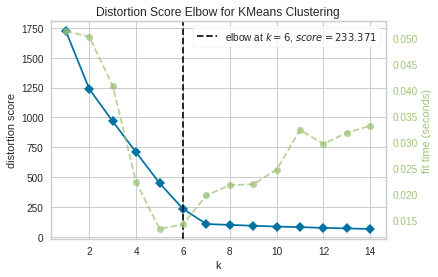


Clusters =  6




In [ ]:
#elbow method for K-means clustering algorithm for data 1
print("\n K-means clustering of Data1.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(data1dimensionkmeans)
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')

In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)
optimum_k = KMeans(n_clusters = 6, init = 'k-means++',  random_state=42)
K_means_clusters = optimum_k.fit_predict(data1dimensionkmeans)
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)
dataframe1['cluster'] = K_means_clusters

 Predicted labels according to number of optimum number of clusters 

 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
data1 = dataframe1[dataframe1.cluster==0]
data2 = dataframe1[dataframe1.cluster==1]
data3 = dataframe1[dataframe1.cluster==2]
data4 = dataframe1[dataframe1.cluster==3]
data5 = dataframe1[dataframe1.cluster==4]
data6 = dataframe1[dataframe1.cluster==5]



K-Means Clustering for Data1.csv



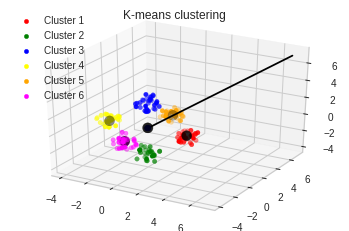

In [ ]:
#Plotting K-means clusters


kplot = plt.axes(projection='3d')
xline = np.linspace(0, 7, 100)
yline = np.linspace(0, 7, 100)
zline = np.linspace(0, 7, 100)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red',     label = 'Cluster 1')
kplot.scatter3D(data2.X1, data2.X2, data2.X3, c ='green',  label = 'Cluster 2')
kplot.scatter3D(data3.X1, data3.X2, data3.X3, c ='blue',   label = 'Cluster 3')
kplot.scatter3D(data4.X1, data4.X2, data4.X3, c ='yellow', label = 'Cluster 4')
kplot.scatter3D(data5.X1, data5.X2, data5.X3, c ='orange', label = 'Cluster 5')
kplot.scatter3D(data6.X1, data6.X2, data6.X3, c ='magenta', label = 'Cluster 6')


plt.scatter(optimum_k.cluster_centers_[:,0], optimum_k.cluster_centers_[:,1], color = 'black', s = 100)
print('\nK-Means Clustering for Data1.csv\n')
plt.legend()
plt.title("K-means clustering")
plt.show()

Task 1 (1) Heirarchical Clustering for Data1.csv

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

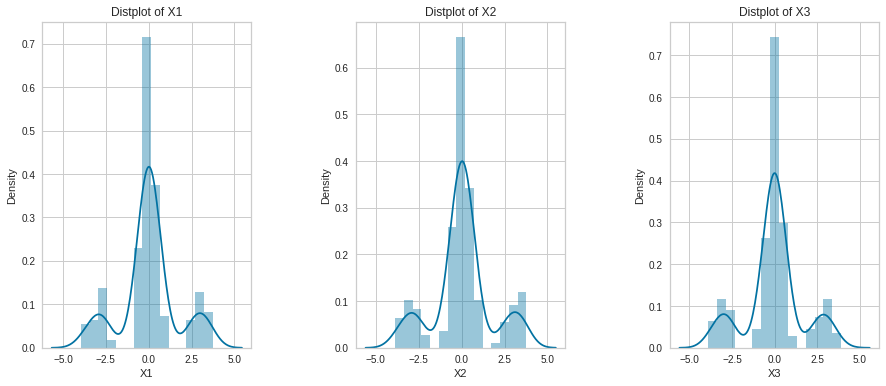

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import seaborn as sns

# graph size
plt.figure(1 , figsize = (15 , 6))
graph = 0

# for loop
for x in ['X1' , 'X2' , 'X3']:
    graph += 1

    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataframe1[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))

# showing the graph
plt.show()

In [ ]:
data1dimheirar = dataframe1.iloc[:,1:4].values
data1dimheirar

array([[-6.327400e-02,  2.773400e-02,  2.268300e-02],
       [-7.310000e-04,  4.821100e-02,  6.919800e-02],
       [-6.076700e-02, -9.080000e-03,  5.308500e-02],
       [ 1.325200e-02, -1.187600e-02,  5.532400e-02],
       [-5.450800e-02, -3.813000e-03,  1.738000e-03],
       [ 2.418000e-02,  6.827500e-02,  3.346200e-02],
       [-2.930800e-02,  5.984900e-02, -6.326000e-02],
       [-1.645300e-02,  1.388100e-02, -1.323600e-02],
       [-4.236100e-02, -5.994200e-02, -2.648700e-02],
       [-1.631000e-02, -3.661200e-02,  4.792800e-02],
       [ 3.536000e-02, -4.495000e-02,  4.147400e-02],
       [-2.870000e-04, -4.949600e-02, -6.343000e-02],
       [-6.593100e-02, -5.381000e-03, -6.489900e-02],
       [ 9.049000e-03,  2.797600e-02,  1.198000e-02],
       [-5.335000e-03,  6.259200e-02, -5.750700e-02],
       [-4.175000e-03,  6.464600e-02,  4.085600e-02],
       [ 9.102400e-02, -3.144600e-02, -1.477400e-02],
       [-7.706800e-02, -3.532400e-02, -3.906000e-02],
       [ 5.515000e-02, -7.04

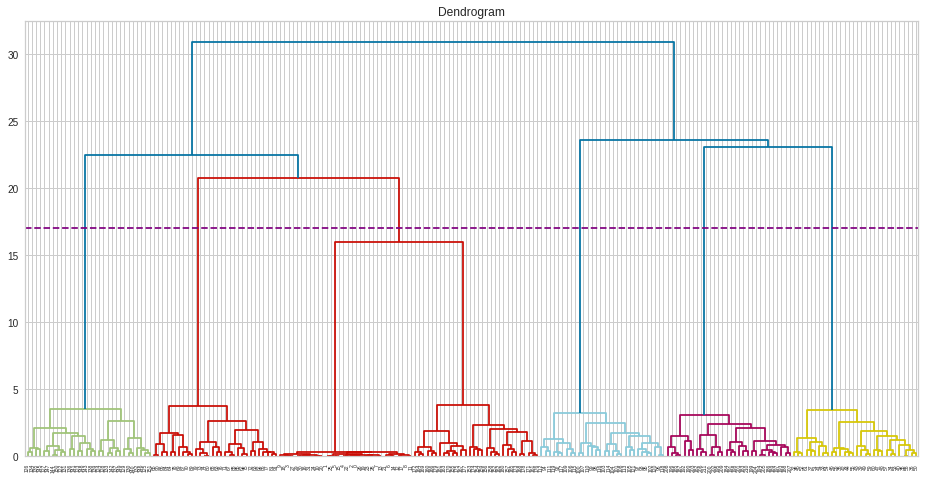

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data1dimheirar, method  = "ward"))

# ploting graphabs
plt.title('Dendrogram')

#drawing threshold
plt.axhline(y=17, color='purple', linestyle='--')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterheiroptimum = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
heirarclusters = clusterheiroptimum.fit_predict(data1dimheirar)
print(heirarclusters)

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
#Plotting Heirarchical Clusters

import plotly as plt
import plotly.graph_objects as go

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='average')

# training the model on dataset
y_model = model.fit_predict(data1dimheirar)

# creating pandas dataframe
dataframe1['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(

    # storing the variables in x, y, and z axis
    x= dataframe1['X1'],
    y= dataframe1['X2'],
    z= dataframe1['X3'],
    mode='markers',
     marker=dict(
        color = dataframe1['cluster'],
        size= 3,
        line=dict(
            color= dataframe1['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'X1'),
            yaxis = dict(title  = 'X2'),
            zaxis = dict(title  = 'X3')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K - Means Clustering) (**Data1**.csv)

In [ ]:
# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K-Means Clustering) (Data2.csv)

KMscore = K_means_clusters.tolist()

print('\nPerformance Evaluation of K-Means Clustering Algorithm for Data1.csv using external validation metrics \n')
print ('Rand Index Score = ', rand_score(KMscore, dataframe1['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(KMscore, dataframe1['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(KMscore, dataframe1['Class'], average='weighted'))

# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (Heirarchical Clustering) (Data2.csv)

Heirarscore = heirarclusters.tolist()

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for Data1.csv using external validation metrics \n')

print ('Rand Index Score = ', rand_score(Heirarscore, dataframe1['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(Heirarscore, dataframe1['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(Heirarscore, dataframe1['Class'], average='weighted'))



Performance Evaluation of K-Means Clustering Algorithm for Data1.csv using external validation metrics 

Rand Index Score =  0.9570777072341947 		Rand Index Adjusted for Chance Score =  0.8411305402492146 		Jaccard Similarity Index Score =  0.42452830188679247

Performance Evaluation of Heirarchical Clustering Algorithm for Data1.csv using external validation metrics 

Rand Index Score =  1.0 		Rand Index Adjusted for Chance Score =  1.0 		Jaccard Similarity Index Score =  0.0


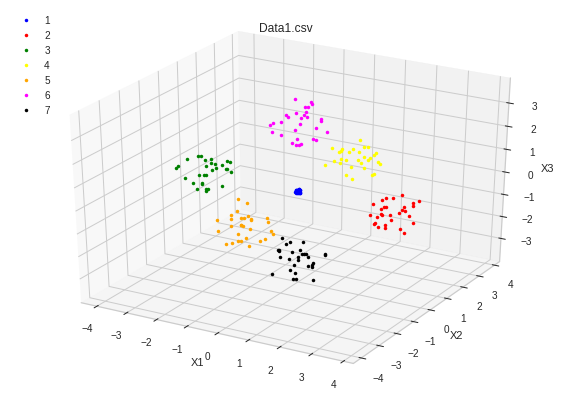

In [ ]:
# Task 1 (3) Plot (2D or 3D) the data points for each dataset and color them according to the original class (Data1.csv)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
groups = dataframe1.groupby("Class")
ax = plt.axes(projection="3d")
ax.set_prop_cycle(color=['blue', 'red', 'green', 'yellow', 'orange', 'magenta', 'black'])

for Class, group in groups:
  ax.plot(group["X1"], group["X2"], group["X3"], marker=".", linestyle="", label= Class)

ax.legend(loc = 'upper left')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Data1.csv')
plt.show()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (K-Means Clustering (Data1.csv)) 



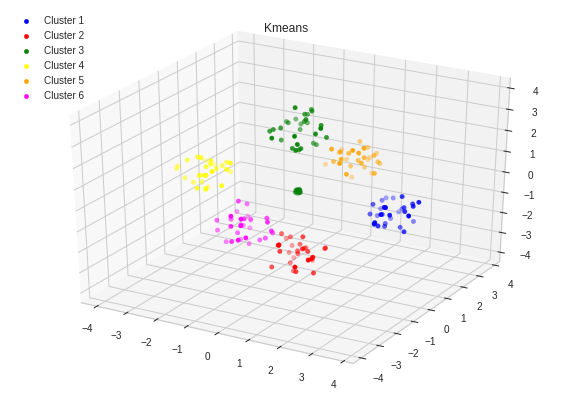


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (Heirarchical Clustering (Data1.csv)) 



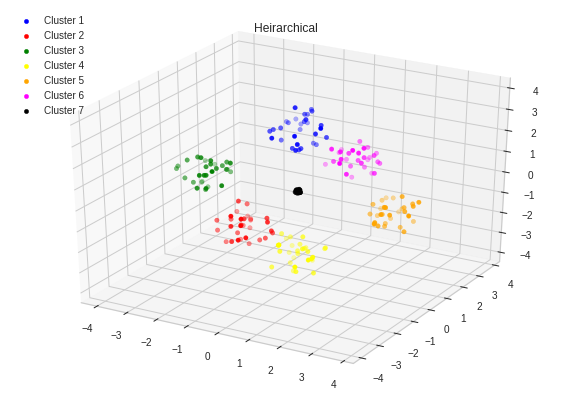

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (K-Means Clustering (Data1.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (K-Means Clustering (Data1.csv)) \n')
plt.figure(figsize=(10,7))
dataframe1['kcluster'] = K_means_clusters
kdata1 = dataframe1[dataframe1.kcluster==0]
kdata2 = dataframe1[dataframe1.kcluster==1]
kdata3 = dataframe1[dataframe1.kcluster==2]
kdata4 = dataframe1[dataframe1.kcluster==3]
kdata5 = dataframe1[dataframe1.kcluster==4]
kdata6 = dataframe1[dataframe1.kcluster==5]

kplot = plt.axes(projection='3d')
kplot.scatter3D(kdata1.X1, kdata1.X2, kdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(kdata2.X1, kdata2.X2, kdata2.X3, c ='red',      label = 'Cluster 2')
kplot.scatter3D(kdata3.X1, kdata3.X2, kdata3.X3, c ='green',    label = 'Cluster 3')
kplot.scatter3D(kdata4.X1, kdata4.X2, kdata4.X3, c ='yellow',   label = 'Cluster 4')
kplot.scatter3D(kdata5.X1, kdata5.X2, kdata5.X3, c ='orange',   label = 'Cluster 5')
kplot.scatter3D(kdata6.X1, kdata6.X2, kdata6.X3, c ='magenta',   label = 'Cluster 6')
plt.legend(loc = 'upper left')
plt.title("Kmeans")
plt.show()

# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (Heirarchical Clustering (Data1.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (Heirarchical Clustering (Data1.csv)) \n')
plt.figure(figsize=(10,7))
dataframe1['hcluster'] = heirarclusters
hdata1 = dataframe1[dataframe1.hcluster==0]
hdata2 = dataframe1[dataframe1.hcluster==1]
hdata3 = dataframe1[dataframe1.hcluster==2]
hdata4 = dataframe1[dataframe1.hcluster==3]
hdata5 = dataframe1[dataframe1.hcluster==4]
hdata6 = dataframe1[dataframe1.hcluster==5]
hdata7 = dataframe1[dataframe1.hcluster==6]


kplot = plt.axes(projection='3d')
kplot.scatter3D(hdata1.X1, hdata1.X2, hdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(hdata2.X1, hdata2.X2, hdata2.X3, c ='red',      label = 'Cluster 2')
kplot.scatter3D(hdata3.X1, hdata3.X2, hdata3.X3, c ='green',    label = 'Cluster 3')
kplot.scatter3D(hdata4.X1, hdata4.X2, hdata4.X3, c ='yellow',   label = 'Cluster 4')
kplot.scatter3D(hdata5.X1, hdata5.X2, hdata5.X3, c ='orange',   label = 'Cluster 5')
kplot.scatter3D(hdata6.X1, hdata6.X2, hdata6.X3, c ='magenta',   label = 'Cluster 6')
kplot.scatter3D(hdata7.X1, hdata7.X2, hdata7.X3, c ='black',   label = 'Cluster 7')
plt.legend(loc = 'upper left')
plt.title("Heirarchical")
plt.show()

Data2.csv

In [ ]:
#Checking for missing values in dataset 2
dataframe2.isnull().sum()

Unnamed: 0    0
X             0
Y             0
C             0
Class         0
dtype: int64

In [ ]:
#contents of dataset 2
dataframe2

Unnamed: 0         X         Y         C  Class
0           X1  3.277701  0.814082  0.326574      1
1           X2  0.387577  0.176780  0.888046      1
2           X3  0.268546  0.582963  0.080981      1
3           X4  2.031145  0.244597  0.643921      1
4           X5  0.188677  0.461280  0.496633      1
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      3
400          X  4.100000  5.100000  0.504558      4
401        X.1  3.900000  4.900000  0.941634      4
402        X.2  4.000000  5.000000  0.702123      4
403        X.3  4.100000  5.100000  0.887645      4

[404 rows x 5 columns]

--------------------------------------------------------------------------------

Task 1 (1) K-means clustering for data2.csv

--------------------------------------------------------------------------------

In [ ]:
#allocating all the features from data set in array
data2dimensionkmeans = dataframe2.iloc[:,1:4].values
data2dimensionkmeans

array([[3.277701  , 0.814082  , 0.32657386],
       [0.387577  , 0.17678   , 0.88804571],
       [0.268546  , 0.582963  , 0.08098138],
       ...,
       [3.9       , 4.9       , 0.94163432],
       [4.        , 5.        , 0.70212258],
       [4.1       , 5.1       , 0.88764508]])


 K-means clustering of Data2.csv 



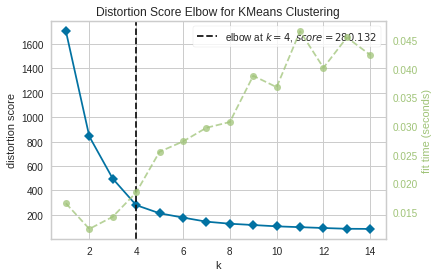


Clusters =  4




In [ ]:
#elbow method for K-means clustering algorithm for data 2
print("\n K-means clustering of Data2.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(data2dimensionkmeans)
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')


In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)
optimum_k = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
K_means_clusters = optimum_k.fit_predict(data2dimensionkmeans)
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)
dataframe2['cluster'] = K_means_clusters

 Predicted labels according to number of optimum number of clusters 

 [2 0 0 2 0 2 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 2 0 0 0 0 2 2 2 2 2 2 0 2 2 2 0
 0 2 0 2 0 0 2 0 0 0 2 2 2 0 2 2 0 0 2 0 2 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 2
 0 2 2 0 0 0 2 0 0 0 2 2 2 0 2 0 0 2 0 0 0 2 0 0 2 2 2 2 0 2 0 2 0 0 2 2 0
 0 0 2 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2 2 0 0 2 2 0 0 2
 2 0 2 2 0 0 0 0 0 2 0 0 0 0 0 2 2 0 2 2 2 0 0 2 0 0 2 0 0 2 2 0 2 2 0 2 0
 2 0 0 0 0 2 2 0 0 0 2 0 0 2 0 3 3 3 3 0 3 0 3 3 3 3 0 3 3 3 3 3 0 3 3 0 3
 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0
 3 0 0 3 3 3 0 0 0 3 0 3 3 0 3 3 3 3 0 3 3 3 0 0 3 3 3 0 3 3 3 3 3 3 0 3 3
 3 0 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3]


In [ ]:
data1 = dataframe2[dataframe2.cluster==0]
data2 = dataframe2[dataframe2.cluster==1]
data3 = dataframe2[dataframe2.cluster==2]
data4 = dataframe2[dataframe2.cluster==3]


K-Means Clustering for Data2.csv



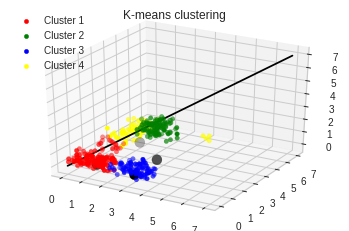

In [ ]:
#Plotting K-means clusters


kplot = plt.axes(projection='3d')
xline = np.linspace(0, 7, 100)
yline = np.linspace(0, 7, 100)
zline = np.linspace(0, 7, 100)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.X, data1.Y, data1.C, c='red',     label = 'Cluster 1')
kplot.scatter3D(data2.X, data2.Y, data2.C, c ='green',  label = 'Cluster 2')
kplot.scatter3D(data3.X, data3.Y, data3.C, c ='blue',   label = 'Cluster 3')
kplot.scatter3D(data4.X, data4.Y, data4.C, c ='yellow', label = 'Cluster 4')

plt.scatter(optimum_k.cluster_centers_[:,0], optimum_k.cluster_centers_[:,1], color = 'black', s = 100)
print('\nK-Means Clustering for Data2.csv\n')
plt.legend()
plt.title("K-means clustering")
plt.show()

--------------------------------------------------------------------------------

Task 1 (1) Heirarchical Clustering for Data2.csv

--------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



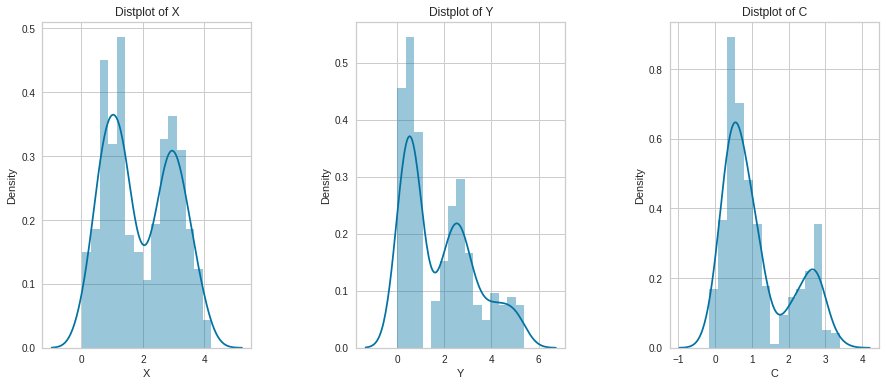

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import seaborn as sns

# graph size
plt.figure(1 , figsize = (15 , 6))
graph = 0

# for loop
for x in ['X' , 'Y' , 'C']:
    graph += 1

    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataframe2[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))

# showing the graph
plt.show()

In [ ]:
data2dimheirar = dataframe2.iloc[:,1:4].values
data2dimheirar

array([[3.277701  , 0.814082  , 0.32657386],
       [0.387577  , 0.17678   , 0.88804571],
       [0.268546  , 0.582963  , 0.08098138],
       ...,
       [3.9       , 4.9       , 0.94163432],
       [4.        , 5.        , 0.70212258],
       [4.1       , 5.1       , 0.88764508]])

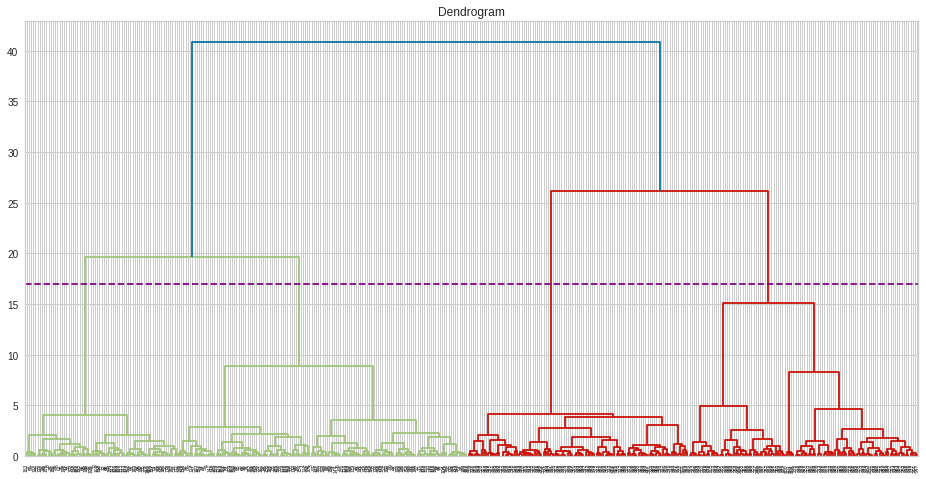

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data2dimheirar, method  = "ward"))

# ploting graphabs
plt.title('Dendrogram')

#drawing threshold
plt.axhline(y=17, color='purple', linestyle='--')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterheiroptimum = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
heirarclusters = clusterheiroptimum.fit_predict(data2dimheirar)
print(heirarclusters)

[3 1 1 1 1 3 1 3 3 1 1 3 3 1 1 3 1 1 1 1 1 3 1 1 1 1 3 3 3 3 3 3 1 3 1 3 1
 1 3 1 3 1 1 3 1 1 1 3 1 1 1 1 3 1 1 3 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 3
 1 3 3 1 1 1 1 1 1 1 3 3 3 1 3 1 1 3 1 1 1 3 1 1 3 3 3 1 1 3 1 3 1 1 3 3 1
 1 1 3 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 3 3 3 3 1 1 3 1 1 1 3
 3 1 1 3 1 1 1 1 1 3 1 1 1 1 1 3 3 1 3 3 3 1 1 3 1 1 3 1 1 3 3 1 3 3 1 3 1
 3 1 1 1 1 3 3 1 1 1 3 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0]


In [ ]:
#Plotting Heirarchical Clusters

import plotly as plt
import plotly.graph_objects as go

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='average')

# training the model on dataset
y_model = model.fit_predict(data2dimheirar)

# creating pandas dataframe
dataframe2['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(

    # storing the variables in x, y, and z axis
    x= dataframe2['X'],
    y= dataframe2['Y'],
    z= dataframe2['C'],
    mode='markers',
     marker=dict(
        color = dataframe2['cluster'],
        size= 3,
        line=dict(
            color= dataframe2['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'X'),
            yaxis = dict(title  = 'Y'),
            zaxis = dict(title  = 'C')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

--------------------------------------------------------------------------------
Task 2 (1) Evaluate the performance of the clustering algorithm using external validation metrics (K - Means Clustering) (Data2.csv)

--------------------------------------------------------------------------------

In [ ]:
# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K-Means Clustering) (Data2.csv)

KMscore = K_means_clusters.tolist()

print('\nPerformance Evaluation of K-Means Clustering Algorithm for Data2.csv using external validation metrics \n')
print ('Rand Index Score = ', rand_score(KMscore, dataframe2['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(KMscore, dataframe2['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(KMscore, dataframe2['Class'], average='weighted'))

# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (Heirarchical Clustering) (Data2.csv)

Heirarscore = heirarclusters.tolist()

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for Data2.csv using external validation metrics \n')

print ('Rand Index Score = ', rand_score(Heirarscore, dataframe2['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(Heirarscore, dataframe2['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(Heirarscore, dataframe2['Class'], average='weighted'))



Performance Evaluation of K-Means Clustering Algorithm for Data2.csv using external validation metrics 

Rand Index Score =  0.8200746873694814 		Rand Index Adjusted for Chance Score =  0.5877644016112638 		Jaccard Similarity Index Score =  0.0

Performance Evaluation of Heirarchical Clustering Algorithm for Data2.csv using external validation metrics 

Rand Index Score =  0.8840503157015454 		Rand Index Adjusted for Chance Score =  0.7339089891331867 		Jaccard Similarity Index Score =  0.21238861386138616


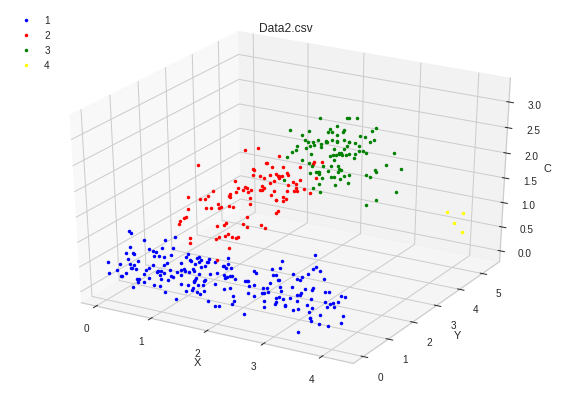

In [ ]:
# Task 1 (3) Plot (2D or 3D) the data points for each dataset and color them according to the original class (Data2.csv)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
groups = dataframe2.groupby("Class")
ax = plt.axes(projection="3d")
ax.set_prop_cycle(color=['blue', 'red', 'green', 'yellow'])

for Class, group in groups:
  ax.plot(group["X"], group["Y"], group["C"], marker=".", linestyle="", label= Class)

ax.legend(loc = 'upper left')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C')
plt.title('Data2.csv')
plt.show()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (K-Means Clustering (Data2.csv)) 



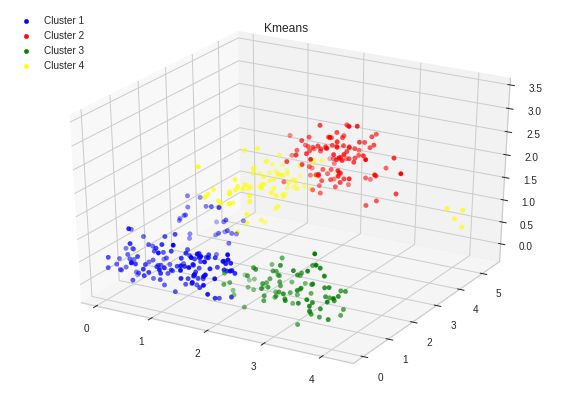


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (Heirarchical Clustering (Data2.csv)) 



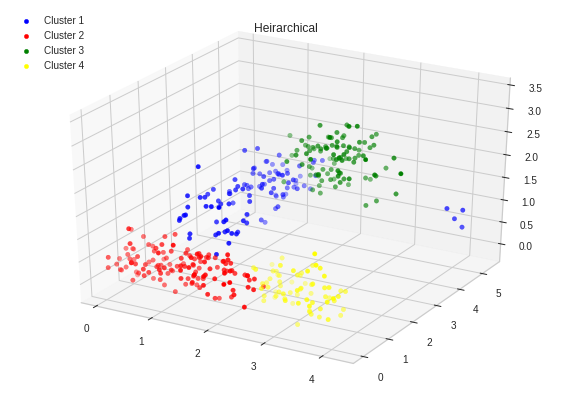

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (K-Means Clustering (Data2.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (K-Means Clustering (Data2.csv)) \n')
plt.figure(figsize=(10,7))
dataframe2['kcluster'] = K_means_clusters
kdata1 = dataframe2[dataframe2.kcluster==0]
kdata2 = dataframe2[dataframe2.kcluster==1]
kdata3 = dataframe2[dataframe2.kcluster==2]
kdata4 = dataframe2[dataframe2.kcluster==3]

kplot = plt.axes(projection='3d')
kplot.scatter3D(kdata1.X, kdata1.Y, kdata1.C, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(kdata2.X, kdata2.Y, kdata2.C, c ='red',      label = 'Cluster 2')
kplot.scatter3D(kdata3.X, kdata3.Y, kdata3.C, c ='green',    label = 'Cluster 3')
kplot.scatter3D(kdata4.X, kdata4.Y, kdata4.C, c ='yellow',   label = 'Cluster 4')
plt.legend(loc = 'upper left')
plt.title("Kmeans")
plt.show()

# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (Heirarchical Clustering (Data2.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (Heirarchical Clustering (Data2.csv)) \n')
plt.figure(figsize=(10,7))
dataframe2['hcluster'] = heirarclusters
hdata1 = dataframe2[dataframe2.hcluster==0]
hdata2 = dataframe2[dataframe2.hcluster==1]
hdata3 = dataframe2[dataframe2.hcluster==2]
hdata4 = dataframe2[dataframe2.hcluster==3]

kplot = plt.axes(projection='3d')
kplot.scatter3D(hdata1.X, hdata1.Y, hdata1.C, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(hdata2.X, hdata2.Y, hdata2.C, c ='red',      label = 'Cluster 2')
kplot.scatter3D(hdata3.X, hdata3.Y, hdata3.C, c ='green',    label = 'Cluster 3')
kplot.scatter3D(hdata4.X, hdata4.Y, hdata4.C, c ='yellow',   label = 'Cluster 4')
plt.legend(loc = 'upper left')
plt.title("Heirarchical")
plt.show()

--------------------------------------------------------------------------------

Data3.csv

--------------------------------------------------------------------------------

In [ ]:
dataframe3.head()

Unnamed: 0        X1        X2        X3  Class
0           1  1.295428  0.050829 -0.385217      1
1           2  1.409178 -0.035191 -0.251980      1
2           3  1.096803  0.246365 -0.415011      1
3           4  1.463328  0.265354 -0.513488      1
4           5  1.603284  0.080577 -0.470257      1

In [ ]:
#Checking for missing values in dataset 3
dataframe3.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

In [ ]:
#contents of dataset 3
dataframe3

Unnamed: 0        X1        X2        X3  Class
0             1  1.295428  0.050829 -0.385217      1
1             2  1.409178 -0.035191 -0.251980      1
2             3  1.096803  0.246365 -0.415011      1
3             4  1.463328  0.265354 -0.513488      1
4             5  1.603284  0.080577 -0.470257      1
..          ...       ...       ...       ...    ...
395         396  0.795695  0.209456  1.880609      4
396         397  0.653127 -0.703156  1.549448      4
397         398 -0.726249 -0.103244  0.694300      4
398         399  0.808596 -0.492640  1.649370      4
399         400  0.749291 -0.447840  0.863555      4

[400 rows x 5 columns]

--------------------------------------------------------------------------------

Task 1 (1) K-means clustering for data3.csv

--------------------------------------------------------------------------------

In [ ]:
#allocating all the features from data set in array
data3dimensionkmeans = dataframe3.iloc[:,1:4].values
data3dimensionkmeans

array([[ 1.295428,  0.050829, -0.385217],
       [ 1.409178, -0.035191, -0.25198 ],
       [ 1.096803,  0.246365, -0.415011],
       ...,
       [-0.726249, -0.103244,  0.6943  ],
       [ 0.808596, -0.49264 ,  1.64937 ],
       [ 0.749291, -0.44784 ,  0.863555]])


 K-means clustering of Data3.csv 



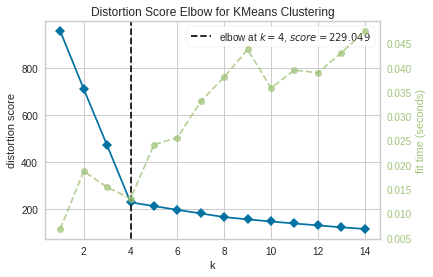


Clusters =  4




In [ ]:
#elbow method for K-means clustering algorithm for data 3

print("\n K-means clustering of Data3.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(data3dimensionkmeans)
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')


In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)

optimum_k = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
K_means_clusters = optimum_k.fit_predict(data3dimensionkmeans)
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)
dataframe3['cluster'] = K_means_clusters

 Predicted labels according to number of optimum number of clusters 

 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
data1 = dataframe3[dataframe3.cluster==0]
data2 = dataframe3[dataframe3.cluster==1]
data3 = dataframe3[dataframe3.cluster==2]
data4 = dataframe3[dataframe3.cluster==3]


K-Means Clustering for Data3.csv



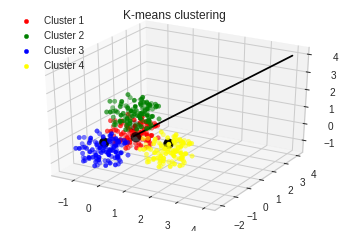

In [ ]:
#Plotting K-means clusters


kplot = plt.axes(projection='3d')
xline = np.linspace(0, 4, 100)
yline = np.linspace(0, 4, 100)
zline = np.linspace(0, 4, 100)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red',     label = 'Cluster 1')
kplot.scatter3D(data2.X1, data2.X2, data2.X3, c ='green',  label = 'Cluster 2')
kplot.scatter3D(data3.X1, data3.X2, data3.X3, c ='blue',   label = 'Cluster 3')
kplot.scatter3D(data4.X1, data4.X2, data4.X3, c ='yellow', label = 'Cluster 4')

plt.scatter(optimum_k.cluster_centers_[:,0], optimum_k.cluster_centers_[:,1], color = 'black', s = 100)
print('\nK-Means Clustering for Data3.csv\n')
plt.legend()
plt.title("K-means clustering")
plt.show()

--------------------------------------------------------------------------------

Task 1 (1) Heirarchical Clustering for Data3.csv

--------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



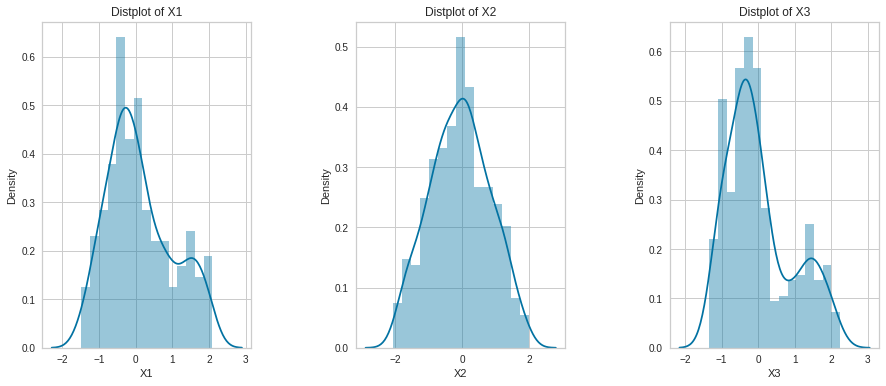

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import seaborn as sns

# graph size
plt.figure(1 , figsize = (15 , 6))
graph = 0

# for loop
for x in ['X1' , 'X2' , 'X3']:
    graph += 1

    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataframe3[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))

# showing the graph
plt.show()

In [ ]:
data3dimheirar = dataframe3.iloc[:,1:4].values
data3dimheirar

array([[ 1.295428,  0.050829, -0.385217],
       [ 1.409178, -0.035191, -0.25198 ],
       [ 1.096803,  0.246365, -0.415011],
       ...,
       [-0.726249, -0.103244,  0.6943  ],
       [ 0.808596, -0.49264 ,  1.64937 ],
       [ 0.749291, -0.44784 ,  0.863555]])

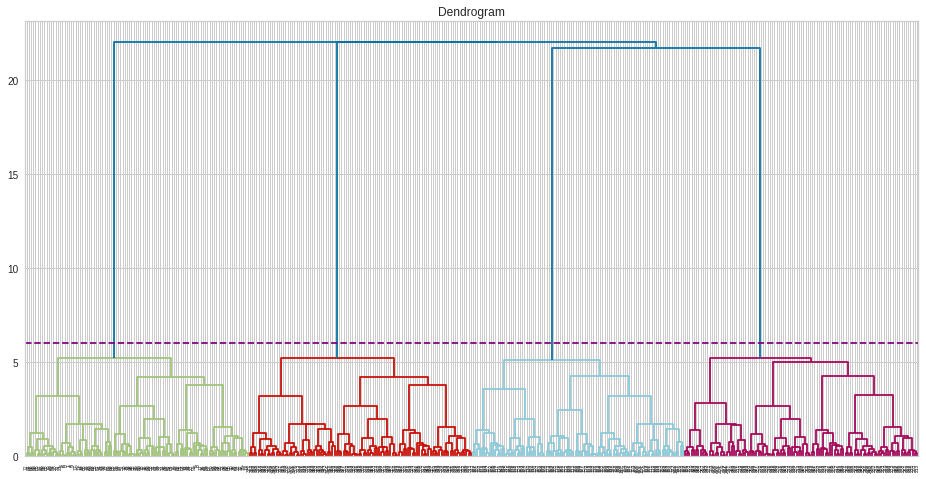

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data3dimheirar, method  = "ward"))


plt.title('Dendrogram')

#drawing threshold
plt.axhline(y=6, color='purple', linestyle='--')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterheiroptimum = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
heirarclusters = clusterheiroptimum.fit_predict(data3dimheirar)
print(heirarclusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
#Plotting Heirarchical Clusters

import plotly as plt
import plotly.graph_objects as go

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='average')

# training the model on dataset
y_model = model.fit_predict(data3dimheirar)

# creating pandas dataframe
dataframe3['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(

    # storing the variables in x, y, and z axis
    x= dataframe3['X1'],
    y= dataframe3['X2'],
    z= dataframe3['X3'],
    mode='markers',
     marker=dict(
        color = dataframe3['cluster'],
        size= 3,
        line=dict(
            color= dataframe3['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'X1'),
            yaxis = dict(title  = 'X2'),
            zaxis = dict(title  = 'X3')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

--------------------------------------------------------------------------------
Task 2 (1) Evaluate the performance of the clustering algorithm using external validation metrics (K - Means Clustering) (Data3.csv)

--------------------------------------------------------------------

In [ ]:
# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K-Means Clustering) (Data3.csv)

KMscore = K_means_clusters.tolist()

print('\nPerformance Evaluation of K-Means Clustering Algorithm for Data3.csv using external validation metrics \n')
print ('Rand Index Score = ', rand_score(KMscore, dataframe3['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(KMscore, dataframe3['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(KMscore, dataframe3['Class'], average='weighted'))

# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (Heirarchical Clustering) (Data3.csv)

Heirarscore = heirarclusters.tolist()

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for Data3.csv using external validation metrics \n')

print ('Rand Index Score = ', rand_score(Heirarscore, dataframe3['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(Heirarscore, dataframe3['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(Heirarscore, dataframe3['Class'], average='weighted'))



Performance Evaluation of K-Means Clustering Algorithm for Data3.csv using external validation metrics 

Rand Index Score =  1.0 		Rand Index Adjusted for Chance Score =  1.0 		Jaccard Similarity Index Score =  0.0

Performance Evaluation of Heirarchical Clustering Algorithm for Data3.csv using external validation metrics 

Rand Index Score =  0.9877819548872181 		Rand Index Adjusted for Chance Score =  0.9672676330087653 		Jaccard Similarity Index Score =  0.25


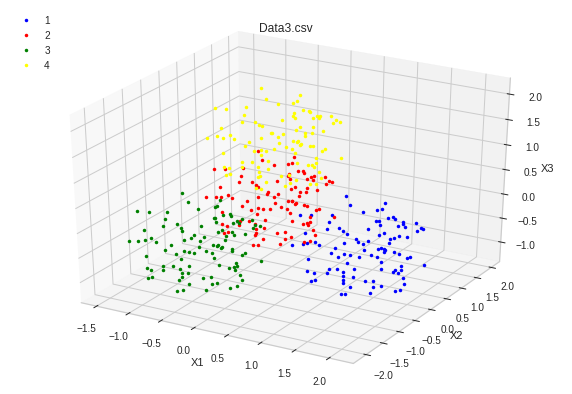

In [ ]:
# Task 1 (3) Plot (2D or 3D) the data points for each dataset and color them according to the original class (Data3.csv)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
groups = dataframe3.groupby("Class")
ax = plt.axes(projection="3d")
ax.set_prop_cycle(color=['blue', 'red', 'green', 'yellow'])

for Class, group in groups:
  ax.plot(group["X1"], group["X2"], group["X3"], marker=".", linestyle="", label= Class)

ax.legend(loc = 'upper left')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Data3.csv')
plt.show()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (K-Means Clustering (Data3.csv)) 



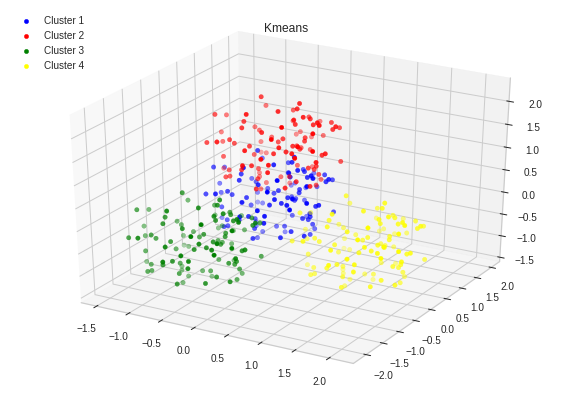


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (Heirarchical Clustering (Data3.csv)) 



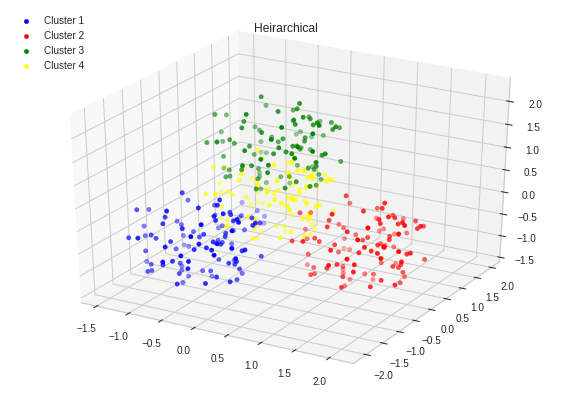

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (K-Means Clustering (Data3.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (K-Means Clustering (Data3.csv)) \n')
plt.figure(figsize=(10,7))
dataframe3['kcluster'] = K_means_clusters
kdata1 = dataframe3[dataframe3.kcluster==0]
kdata2 = dataframe3[dataframe3.kcluster==1]
kdata3 = dataframe3[dataframe3.kcluster==2]
kdata4 = dataframe3[dataframe3.kcluster==3]

kplot = plt.axes(projection='3d')
kplot.scatter3D(kdata1.X1, kdata1.X2, kdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(kdata2.X1, kdata2.X2, kdata2.X3, c ='red',      label = 'Cluster 2')
kplot.scatter3D(kdata3.X1, kdata3.X2, kdata3.X3, c ='green',    label = 'Cluster 3')
kplot.scatter3D(kdata4.X1, kdata4.X2, kdata4.X3, c ='yellow',   label = 'Cluster 4')
plt.legend(loc = 'upper left')
plt.title("Kmeans")
plt.show()

# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (Heirarchical Clustering (Data3.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (Heirarchical Clustering (Data3.csv)) \n')
plt.figure(figsize=(10,7))
dataframe3['hcluster'] = heirarclusters
hdata1 = dataframe3[dataframe3.hcluster==0]
hdata2 = dataframe3[dataframe3.hcluster==1]
hdata3 = dataframe3[dataframe3.hcluster==2]
hdata4 = dataframe3[dataframe3.hcluster==3]

kplot = plt.axes(projection='3d')
kplot.scatter3D(hdata1.X1, hdata1.X2, hdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(hdata2.X1, hdata2.X2, hdata2.X3, c ='red',      label = 'Cluster 2')
kplot.scatter3D(hdata3.X1, hdata3.X2, hdata3.X3, c ='green',    label = 'Cluster 3')
kplot.scatter3D(hdata4.X1, hdata4.X2, hdata4.X3, c ='yellow',   label = 'Cluster 4')
plt.legend(loc = 'upper left')
plt.title("Heirarchical")
plt.show()

------------------------------------------------------------------------------

Data 4.csv

------------------------------------------------------------------------------

In [ ]:
dataframe4.head()

Unnamed: 0      X1     X2       X3  Class
0           1 -0.4530 -0.891  0.02300      1
1           2  0.6530 -0.846  0.02110      1
2           3  0.3980  0.913 -0.00139      1
3           4  0.0952  1.050  0.00628      1
4           5  0.5240 -0.941  0.03780      1

In [ ]:
#Checking for missing values in dataset 4
dataframe4.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

In [ ]:
#contents of dataset 4
dataframe4

Unnamed: 0       X1      X2       X3  Class
0             1 -0.45300 -0.8910  0.02300      1
1             2  0.65300 -0.8460  0.02110      1
2             3  0.39800  0.9130 -0.00139      1
3             4  0.09520  1.0500  0.00628      1
4             5  0.52400 -0.9410  0.03780      1
..          ...      ...     ...      ...    ...
995         996  0.01520  0.0531 -0.36100      2
996         997  0.05160  0.6910  0.87500      2
997         998 -0.00511  1.3900 -0.94700      2
998         999 -0.06710  0.7140  0.88100      2
999        1000 -0.05770  0.4280 -0.73000      2

[1000 rows x 5 columns]

--------------------------------------------------------------------------------

Task 1 (1) K-means clustering for data4.csv

------------------------------------------------------------------------------

In [ ]:
#allocating all the features from data set in array
data4dimensionkmeans = dataframe4.iloc[:,1:4].values
data4dimensionkmeans

array([[-0.453  , -0.891  ,  0.023  ],
       [ 0.653  , -0.846  ,  0.0211 ],
       [ 0.398  ,  0.913  , -0.00139],
       ...,
       [-0.00511,  1.39   , -0.947  ],
       [-0.0671 ,  0.714  ,  0.881  ],
       [-0.0577 ,  0.428  , -0.73   ]])


 K-means clustering of Data5.csv 



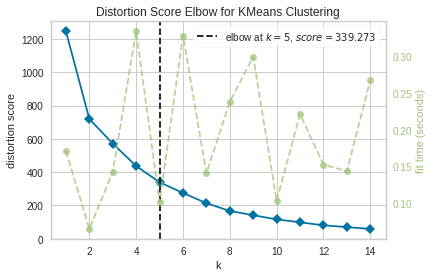


Clusters =  5




In [ ]:
#elbow method for K-means clustering algorithm for data 4
print("\n K-means clustering of Data5.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(data4dimensionkmeans)
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')


In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)

optimum_k = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
K_means_clusters = optimum_k.fit_predict(data4dimensionkmeans)
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)
dataframe4['cluster'] = K_means_clusters

 Predicted labels according to number of optimum number of clusters 

 [0 2 1 1 2 1 1 0 0 0 2 0 1 1 2 2 0 1 1 0 2 0 1 0 0 1 2 1 0 0 2 2 2 0 2 2 1
 0 1 2 1 1 0 0 1 1 0 0 1 0 2 2 0 0 2 0 2 2 1 0 0 1 2 1 0 0 0 1 1 2 1 1 0 2
 0 1 1 1 0 1 2 2 2 2 2 0 2 1 0 2 0 1 1 2 1 1 0 2 0 2 2 1 1 2 0 1 2 2 1 2 1
 0 0 2 2 1 2 0 2 1 1 2 2 2 1 0 0 0 2 1 2 0 0 2 2 0 1 2 0 2 1 1 0 2 1 2 2 1
 2 0 1 2 2 2 2 1 2 1 0 2 2 2 1 0 2 0 2 0 2 1 0 2 2 1 1 0 0 2 0 0 0 0 2 0 1
 2 0 2 0 2 0 0 1 0 1 2 0 0 2 0 2 0 2 1 0 2 1 2 2 0 0 0 0 2 1 0 0 0 1 2 0 2
 1 1 0 0 2 2 0 0 1 2 0 2 0 0 1 2 2 2 2 1 0 1 2 0 0 1 1 2 0 1 2 1 1 0 2 2 0
 1 0 0 0 0 2 0 0 1 1 0 2 2 1 2 0 1 0 1 2 0 0 1 0 2 1 0 1 0 2 2 2 2 0 1 2 2
 0 1 2 1 0 0 1 0 2 2 0 0 2 0 2 0 2 0 1 1 0 2 2 1 2 2 2 2 1 1 1 2 2 0 1 1 0
 0 1 2 2 1 1 0 0 0 0 2 0 0 2 2 1 0 1 2 0 0 2 0 2 1 1 2 0 2 1 1 1 0 2 0 2 0
 2 2 2 2 2 2 0 2 1 2 1 0 1 1 1 1 2 2 0 0 1 2 0 0 2 0 1 0 1 0 0 1 1 1 0 2 1
 2 2 0 0 1 1 0 1 2 0 0 0 0 1 1 0 0 1 0 2 0 0 2 1 2 0 2 2 2 2 0 2 0 0 0 0 2
 2 1 2 2 2 0 2 0 1 2 2 0 0 2 

In [ ]:
data1 = dataframe4[dataframe4.cluster==0]
data2 = dataframe4[dataframe4.cluster==1]
data3 = dataframe4[dataframe4.cluster==2]
data4 = dataframe4[dataframe4.cluster==3]


K-Means Clustering for Data4.csv



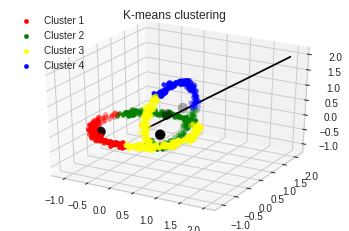

In [ ]:
#Plotting K-means clusters


kplot = plt.axes(projection='3d')
xline = np.linspace(0, 2, 100)
yline = np.linspace(0, 2, 100)
zline = np.linspace(0, 2, 100)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red',     label = 'Cluster 1')
kplot.scatter3D(data2.X1, data2.X2, data2.X3, c ='green',  label = 'Cluster 2')
kplot.scatter3D(data3.X1, data3.X2, data3.X3, c ='yellow',  label = 'Cluster 3')
kplot.scatter3D(data4.X1, data4.X2, data4.X3, c ='blue',  label = 'Cluster 4')


plt.scatter(optimum_k.cluster_centers_[:,0], optimum_k.cluster_centers_[:,1], color = 'black', s = 100)
print('\nK-Means Clustering for Data4.csv\n')
plt.legend()
plt.title("K-means clustering")
plt.show()

--------------------------------------------------------------------------------

Task 1 (1) Heirarchical Clustering for Data4.csv

------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



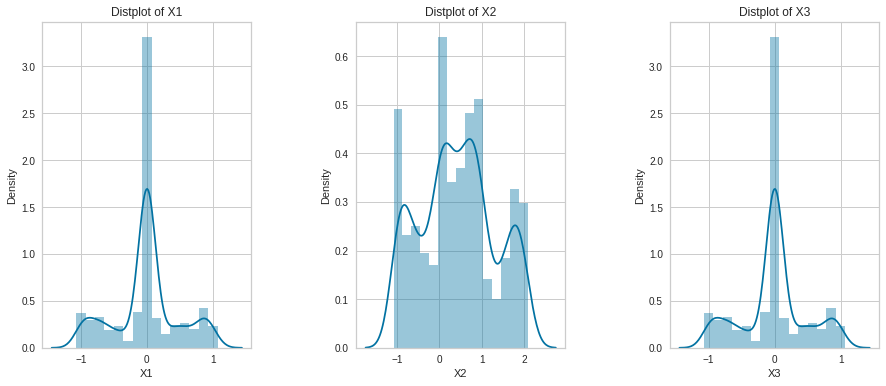

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import seaborn as sns

# graph size
plt.figure(1 , figsize = (15 , 6))
graph = 0

# for loop
for x in ['X1' , 'X2' , 'X3']:
    graph += 1

    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataframe4[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))

# showing the graph
plt.show()

In [ ]:
data4dimheirar = dataframe4.iloc[:,1:4].values
data4dimheirar

array([[-0.453  , -0.891  ,  0.023  ],
       [ 0.653  , -0.846  ,  0.0211 ],
       [ 0.398  ,  0.913  , -0.00139],
       ...,
       [-0.00511,  1.39   , -0.947  ],
       [-0.0671 ,  0.714  ,  0.881  ],
       [-0.0577 ,  0.428  , -0.73   ]])

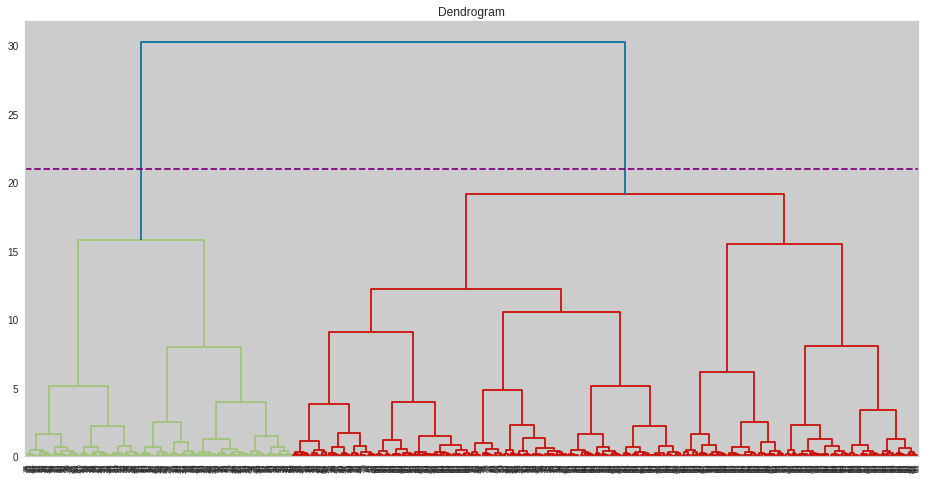

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data4dimheirar, method  = "ward"))


plt.title('Dendrogram')

#drawing threshold
plt.axhline(y=21, color='purple', linestyle='--')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterheiroptimum = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
heirarclusters = clusterheiroptimum.fit_predict(data4dimheirar)
print(heirarclusters)

[1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0
 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 0 0 1 1 0 1 1 0 1 0 1 

In [ ]:
#Plotting Heirarchical Clusters

import plotly as plt
import plotly.graph_objects as go

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')

# training the model on dataset
y_model = model.fit_predict(data4dimheirar)

# creating pandas dataframe
dataframe4['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(

    # storing the variables in x, y, and z axis
    x= dataframe4['X1'],
    y= dataframe4['X2'],
    z= dataframe4['X3'],
    mode='markers',
     marker=dict(
        color = dataframe4['cluster'],
        size= 3,
        line=dict(
            color= dataframe4['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'X1'),
            yaxis = dict(title  = 'X2'),
            zaxis = dict(title  = 'X3')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

--------------------------------------------------------------------------------
Task 2 (1) Evaluate the performance of the clustering algorithm using external validation metrics (K - Means Clustering) (Data4.csv)

------------------------------------------------------------------------------

In [ ]:
# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K-Means Clustering) (Data4.csv)

KMscore = K_means_clusters.tolist()

print('\nPerformance Evaluation of K-Means Clustering Algorithm for Data4.csv using external validation metrics \n')
print ('Rand Index Score = ', rand_score(KMscore, dataframe4['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(KMscore, dataframe4['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(KMscore, dataframe4['Class'], average='weighted'))


# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (Heirarchical Clustering) (Data4.csv)

Heirarscore = heirarclusters.tolist()

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for Data4.csv using external validation metrics \n')

print ('Rand Index Score = ', rand_score(Heirarscore, dataframe4['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(Heirarscore, dataframe4['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(Heirarscore, dataframe4['Class'], average='weighted'))




Performance Evaluation of K-Means Clustering Algorithm for Data4.csv using external validation metrics 

Rand Index Score =  0.5655115115115115 		Rand Index Adjusted for Chance Score =  0.13062343425936673 		Jaccard Similarity Index Score =  0.13525441176470587

Performance Evaluation of Heirarchical Clustering Algorithm for Data4.csv using external validation metrics 

Rand Index Score =  0.6784804804804805 		Rand Index Adjusted for Chance Score =  0.35706442581215536 		Jaccard Similarity Index Score =  0.178802


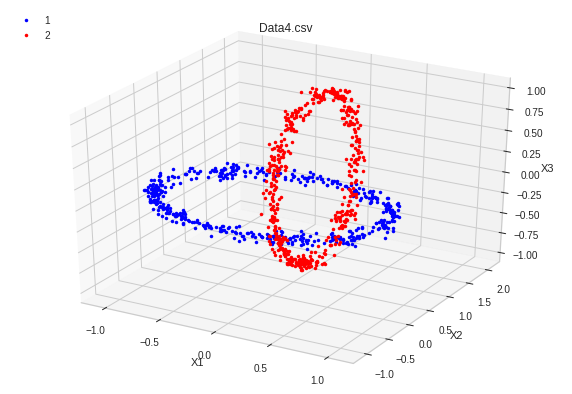

In [ ]:
# Task 1 (3) Plot (2D or 3D) the data points for each dataset and color them according to the original class (Data4.csv)
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
groups = dataframe4.groupby("Class")
ax = plt.axes(projection="3d")
ax.set_prop_cycle(color=['blue', 'red', 'green', 'yellow', 'purple'])

for Class, group in groups:
  ax.plot(group["X1"], group["X2"], group["X3"], marker=".", linestyle="", label= Class)

ax.legend(loc = 'upper left')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Data4.csv')
plt.show()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (K-Means Clustering (Data4.csv)) 



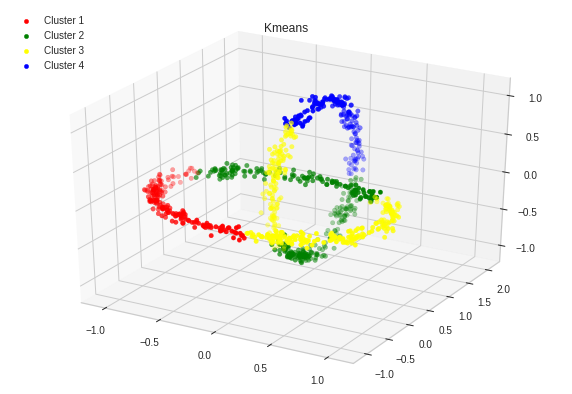


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (Heirarchical Clustering (Data4.csv)) 



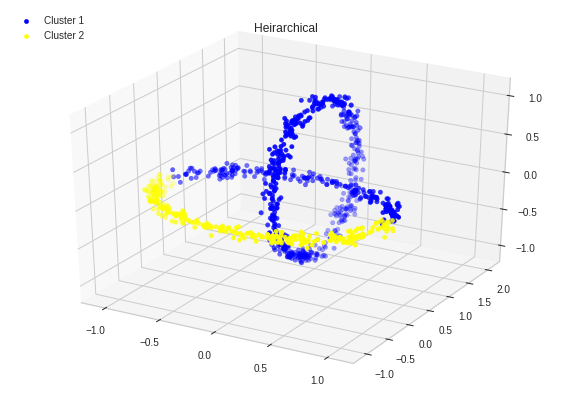

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (K-Means Clustering (Data4.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (K-Means Clustering (Data4.csv)) \n')
plt.figure(figsize=(10,7))
dataframe4['Kcluster'] = K_means_clusters
kdata1 = dataframe4[dataframe4.Kcluster==0]
kdata2 = dataframe4[dataframe4.Kcluster==1]
kdata3 = dataframe4[dataframe4.Kcluster==2]
kdata4 = dataframe4[dataframe4.Kcluster==3]

kplot = plt.axes(projection='3d')
kplot.scatter3D(kdata1.X1, kdata1.X2, kdata1.X3, c ='red',     label = 'Cluster 1')
kplot.scatter3D(kdata2.X1, kdata2.X2, kdata2.X3, c ='green',      label = 'Cluster 2')
kplot.scatter3D(kdata3.X1, kdata3.X2, kdata3.X3, c ='yellow',      label = 'Cluster 3')
kplot.scatter3D(kdata4.X1, kdata4.X2, kdata4.X3, c ='blue',      label = 'Cluster 4')
plt.legend(loc = 'upper left')
plt.title("Kmeans")
plt.show()


# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (Heirarchical Clustering (Data4.csv))


print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (Heirarchical Clustering (Data4.csv)) \n')
plt.figure(figsize=(10,7))
dataframe4['Hcluster'] = heirarclusters
hdata1 = dataframe4[dataframe4.Hcluster==0]
hdata2 = dataframe4[dataframe4.Hcluster==1]


kplot = plt.axes(projection='3d')
kplot.scatter3D(hdata1.X1, hdata1.X2, hdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(hdata2.X1, hdata2.X2, hdata2.X3, c ='yellow',      label = 'Cluster 2')


plt.legend(loc = 'upper left')
plt.title("Heirarchical")
plt.show()

Data 5.csv

In [ ]:
#Checking dataset 5 to identify relevant variables
dataframe5.head()

Unnamed: 0         X1         X2         X3  Class  cluster
0           1  -4.822490 -50.402170   4.020861      1        5
1           2 -44.460120  20.964670 -11.492060      1        3
2           3  50.001020   0.780748   9.134460      1        4
3           4 -41.699080 -22.310060  16.314120      1        3
4           5   4.425242  -4.666664  50.223740      1        1

In [ ]:
#Checking for missing values in dataset 5
dataframe5.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
cluster       0
dtype: int64

In [ ]:
#contents of dataset 5
dataframe5

Unnamed: 0         X1         X2         X3  Class  cluster
0             1  -4.822490 -50.402170   4.020861      1        5
1             2 -44.460120  20.964670 -11.492060      1        3
2             3  50.001020   0.780748   9.134460      1        4
3             4 -41.699080 -22.310060  16.314120      1        3
4             5   4.425242  -4.666664  50.223740      1        1
..          ...        ...        ...        ...    ...      ...
795         796  -1.531027   0.681636   0.543271      2        2
796         797   0.500754  -1.848209   0.605654      2        2
797         798   1.089574  -0.246493  -3.355758      2        2
798         799  -1.907717   4.964502   2.098423      2        2
799         800   3.415463   4.529521  -1.617736      2        2

[800 rows x 6 columns]

Task 1 (1) K-means clustering for data5.csv

In [ ]:
#allocating all the features from data set in array
data5dimensionkmeans = dataframe5.iloc[:,1:4].values
data5dimensionkmeans

array([[ -4.82249  , -50.40217  ,   4.020861 ],
       [-44.46012  ,  20.96467  , -11.49206  ],
       [ 50.00102  ,   0.7807481,   9.13446  ],
       ...,
       [  1.089574 ,  -0.2464933,  -3.355758 ],
       [ -1.907717 ,   4.964502 ,   2.098423 ],
       [  3.415463 ,   4.529521 ,  -1.617736 ]])


 K-means clustering of Data5.csv 



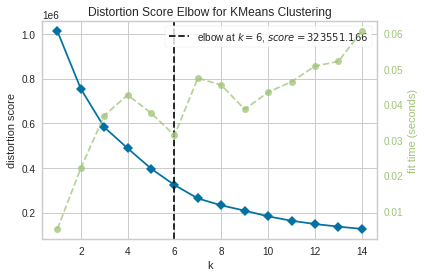


Clusters =  6




In [ ]:
#elbow method for K-means clustering algorithm for data 5
print("\n K-means clustering of Data5.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(data5dimensionkmeans)
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')


In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)
optimum_k = KMeans(n_clusters = 6, init = 'k-means++',  random_state=42)
K_means_clusters = optimum_k.fit_predict(data5dimensionkmeans)
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)
dataframe5['cluster'] = K_means_clusters

 Predicted labels according to number of optimum number of clusters 

 [5 3 4 3 1 4 1 4 4 1 3 5 0 5 1 4 3 1 5 5 5 3 3 0 5 4 1 3 3 0 5 3 3 3 1 3 5
 5 1 1 5 4 4 0 5 5 1 5 3 3 0 0 0 0 1 5 0 0 1 5 3 3 3 0 0 5 1 0 3 0 4 5 0 1
 4 5 1 0 1 0 1 0 0 3 0 5 1 5 0 1 4 3 1 4 4 0 4 5 1 3 5 1 0 3 4 3 1 4 1 3 5
 3 5 3 5 0 1 1 4 1 4 0 3 0 2 4 1 5 5 4 5 3 1 1 0 4 5 0 3 1 0 5 4 0 5 0 5 1
 0 5 0 1 0 5 0 5 4 0 5 0 0 4 1 0 0 4 5 1 0 3 3 5 0 0 0 1 3 5 1 0 3 3 5 1 3
 4 1 3 3 5 4 1 3 4 3 1 0 5 0 5 5 3 3 5 0 0 4 0 5 1 5 4 1 1 5 5 0 0 3 5 5 1
 4 0 5 3 0 0 5 3 5 3 1 1 1 4 0 5 4 0 4 0 3 0 4 0 3 0 3 1 1 3 0 0 3 0 1 4 3
 1 0 0 0 5 0 5 0 1 4 3 1 5 1 1 5 0 0 0 1 0 0 0 4 0 5 1 1 4 3 1 4 3 3 0 3 1
 3 0 0 1 1 0 0 4 0 0 0 1 0 4 3 0 1 1 3 3 3 1 0 5 0 3 4 0 3 0 1 4 1 1 1 3 1
 4 1 4 0 0 5 1 4 5 0 4 1 0 0 5 5 4 1 0 0 1 3 3 3 0 1 1 0 0 4 4 5 4 1 1 4 5
 1 0 5 1 0 3 4 4 4 4 5 3 3 0 4 3 4 3 1 4 5 0 5 0 5 4 0 4 1 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
data1 = dataframe5[dataframe5.cluster==0]
data2 = dataframe5[dataframe5.cluster==1]
data3 = dataframe5[dataframe5.cluster==2]
data4 = dataframe5[dataframe5.cluster==3]
data5 = dataframe5[dataframe5.cluster==4]
data6 = dataframe5[dataframe5.cluster==5]


K-Means Clustering for Data5.csv



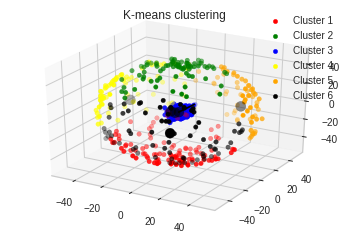

In [ ]:
#Plotting K-means clusters


kplot = plt.axes(projection='3d')
xline = np.linspace(0, 7, 100)
yline = np.linspace(0, 7, 100)
zline = np.linspace(0, 7, 100)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1, data2.X2, data2.X3, c ='green',  label = 'Cluster 2')
kplot.scatter3D(data3.X1, data3.X2, data3.X3, c ='blue',   label = 'Cluster 3')
kplot.scatter3D(data4.X1, data4.X2, data4.X3, c ='yellow', label = 'Cluster 4')
kplot.scatter3D(data5.X1, data5.X2, data5.X3, c ='orange',   label = 'Cluster 5')
kplot.scatter3D(data6.X1, data6.X2, data6.X3, c ='black', label = 'Cluster 6')

plt.scatter(optimum_k.cluster_centers_[:,0], optimum_k.cluster_centers_[:,1], color = 'black', s = 100)
print('\nK-Means Clustering for Data5.csv\n')
plt.legend()
plt.title("K-means clustering")
plt.show()

Task 1 (1) Heirarchical Clustering for Data5.csv

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



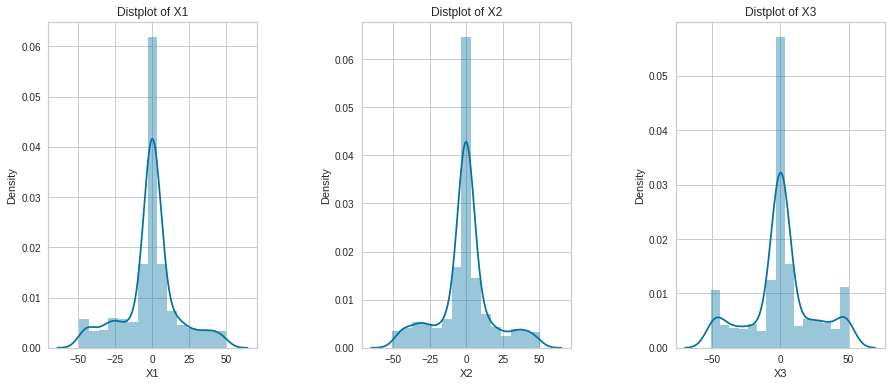

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import seaborn as sns

# graph size
plt.figure(1 , figsize = (15 , 6))
graph = 0

# for loop
for x in ['X1' , 'X2' , 'X3']:
    graph += 1

    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataframe5[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))

# showing the graph
plt.show()

In [ ]:
data5dimheirar = dataframe5.iloc[:,1:4].values
data5dimheirar

array([[ -4.82249  , -50.40217  ,   4.020861 ],
       [-44.46012  ,  20.96467  , -11.49206  ],
       [ 50.00102  ,   0.7807481,   9.13446  ],
       ...,
       [  1.089574 ,  -0.2464933,  -3.355758 ],
       [ -1.907717 ,   4.964502 ,   2.098423 ],
       [  3.415463 ,   4.529521 ,  -1.617736 ]])

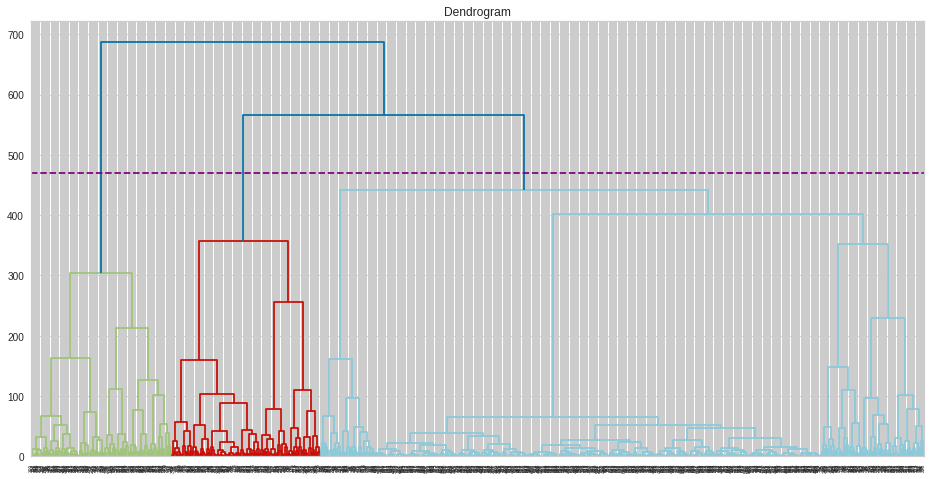

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data5dimheirar, method  = "ward"))

# ploting graphabs
plt.title('Dendrogram')

#drawing threshold
plt.axhline(y=470, color='purple', linestyle='--')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterheiroptimum = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
heirarclusters = clusterheiroptimum.fit_predict(data5dimheirar)
print(heirarclusters)

[1 0 2 0 2 2 2 2 2 2 0 0 1 2 2 0 0 2 0 1 1 0 0 1 2 0 2 0 0 1 2 0 0 0 2 0 1
 0 2 2 2 2 2 1 1 2 2 1 0 0 1 1 0 1 0 1 1 1 2 2 0 0 0 1 1 2 2 1 0 1 0 0 1 2
 0 1 2 1 2 1 2 0 1 0 0 0 2 2 1 2 0 0 2 0 0 0 0 1 2 0 2 2 1 0 0 0 2 2 0 0 2
 0 1 0 1 1 2 2 0 2 0 0 0 0 0 0 2 2 0 2 2 0 2 2 1 2 0 1 0 2 1 2 0 1 1 1 2 2
 0 1 1 2 1 1 1 0 0 1 2 1 1 2 2 1 1 2 2 2 1 0 0 2 0 0 1 2 0 1 2 1 0 0 1 2 0
 0 2 0 0 1 2 2 0 0 0 2 1 2 1 1 1 0 0 1 1 1 0 0 1 2 1 0 2 2 2 1 1 0 0 2 1 2
 2 1 0 0 1 0 1 0 2 0 0 0 2 2 1 1 2 1 0 0 0 1 2 1 0 1 0 2 2 0 0 1 0 0 2 2 0
 2 1 1 1 1 1 1 1 2 0 0 2 1 2 2 2 1 1 0 2 1 1 1 0 1 1 2 2 2 0 2 0 0 0 1 0 2
 0 1 1 2 2 1 1 0 1 1 1 2 1 0 0 1 2 2 0 0 0 2 1 2 1 0 2 0 0 1 0 2 2 0 0 0 2
 2 2 0 1 1 1 2 2 1 0 0 2 1 1 1 2 0 2 1 1 2 0 0 0 1 2 0 1 1 2 2 1 2 2 2 0 1
 2 1 2 2 1 0 0 2 0 2 1 0 0 1 0 0 0 2 2 2 1 1 1 1 2 2 0 0 2 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Plotting Heirarchical Clusters

import plotly as plt
import plotly.graph_objects as go

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

# training the model on dataset
y_model = model.fit_predict(data5dimheirar)

# creating pandas dataframe
dataframe5['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(

    # storing the variables in x, y, and z axis
    x= dataframe5['X1'],
    y= dataframe5['X2'],
    z= dataframe5['X3'],
    mode='markers',
     marker=dict(
        color = dataframe5['cluster'],
        size= 3,
        line=dict(
            color= dataframe5['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'X1'),
            yaxis = dict(title  = 'X2'),
            zaxis = dict(title  = 'X3')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

Task 2 (1) Evaluate the performance of the clustering algorithm using external validation metrics (K - Means Clustering) (Data5.csv)

In [ ]:
# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K-Means Clustering) (Data5.csv)

KMscore = K_means_clusters.tolist()

print('\nPerformance Evaluation of K-Means Clustering Algorithm for Data5.csv using external validation metrics \n')
print ('Rand Index Score = ', rand_score(KMscore, dataframe5['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(KMscore, dataframe5['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(KMscore, dataframe5['Class'], average='weighted'))

# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (Heirarchical Clustering) (Data5.csv)

Heirarscore = heirarclusters.tolist()

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for Data5.csv using external validation metrics \n')

print ('Rand Index Score = ', rand_score(Heirarscore, dataframe5['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(Heirarscore, dataframe5['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(Heirarscore, dataframe5['Class'], average='weighted'))



Performance Evaluation of K-Means Clustering Algorithm for Data5.csv using external validation metrics 

Rand Index Score =  0.8001126408010013 		Rand Index Adjusted for Chance Score =  0.6000270371680193 		Jaccard Similarity Index Score =  0.522578125

Performance Evaluation of Heirarchical Clustering Algorithm for Data5.csv using external validation metrics 

Rand Index Score =  0.6568304130162703 		Rand Index Adjusted for Chance Score =  0.313676538127909 		Jaccard Similarity Index Score =  0.0496125


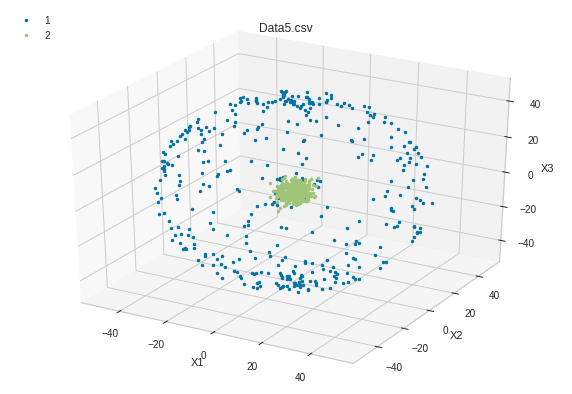

In [ ]:
# Task 1 (3) Plot (2D or 3D) the data points for each dataset and color them according to the original class (Data5.csv)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
groups = dataframe5.groupby("Class")
ax = plt.axes(projection="3d")


for Class, group in groups:
  ax.plot(group["X1"], group["X2"], group["X3"], marker=".", linestyle="", label= Class)

ax.legend(loc = 'upper left')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Data5.csv')
plt.show()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (K-Means Clustering (Data5.csv)) 



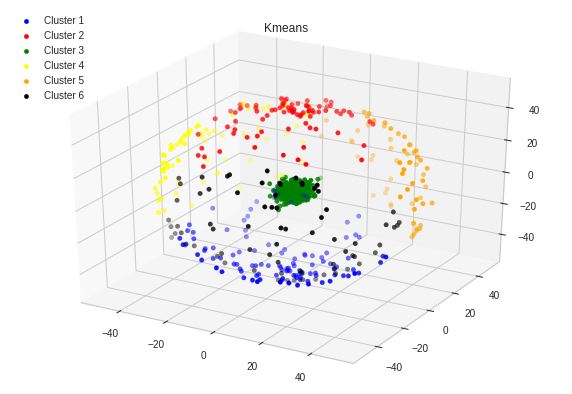


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (Heirarchical Clustering (Data5.csv)) 



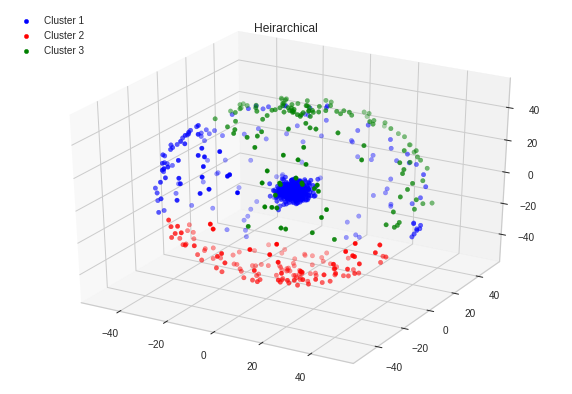

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (K-Means Clustering (Data5.csv))
import matplotlib.pyplot as plt

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (K-Means Clustering (Data5.csv)) \n')
plt.figure(figsize=(10,7))
dataframe5['kcluster'] = K_means_clusters
kdata1 = dataframe5[dataframe5.kcluster==0]
kdata2 = dataframe5[dataframe5.kcluster==1]
kdata3 = dataframe5[dataframe5.kcluster==2]
kdata4 = dataframe5[dataframe5.kcluster==3]
kdata5 = dataframe5[dataframe5.kcluster==4]
kdata6 = dataframe5[dataframe5.kcluster==5]


kplot = plt.axes(projection='3d')
kplot.scatter3D(kdata1.X1, kdata1.X2, kdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(kdata2.X1, kdata2.X2, kdata2.X3, c ='red',      label = 'Cluster 2')
kplot.scatter3D(kdata3.X1, kdata3.X2, kdata3.X3, c ='green',    label = 'Cluster 3')
kplot.scatter3D(kdata4.X1, kdata4.X2, kdata4.X3, c ='yellow',   label = 'Cluster 4')
kplot.scatter3D(kdata5.X1, kdata5.X2, kdata5.X3, c ='orange',   label = 'Cluster 5')
kplot.scatter3D(kdata6.X1, kdata6.X2, kdata6.X3, c ='black',    label = 'Cluster 6')
plt.legend(loc = 'upper left')
plt.title("Kmeans")
plt.show()

# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (Heirarchical Clustering (Data5.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (Heirarchical Clustering (Data5.csv)) \n')
plt.figure(figsize=(10,7))
dataframe5['hcluster'] = heirarclusters
hdata1 = dataframe5[dataframe5.hcluster==0]
hdata2 = dataframe5[dataframe5.hcluster==1]
hdata3 = dataframe5[dataframe5.hcluster==2]


kplot = plt.axes(projection='3d')
kplot.scatter3D(hdata1.X1, hdata1.X2, hdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(hdata2.X1, hdata2.X2, hdata2.X3, c ='red',      label = 'Cluster 2')
kplot.scatter3D(hdata3.X1, hdata3.X2, hdata3.X3, c ='green',    label = 'Cluster 3')


plt.legend(loc = 'upper left')
plt.title("Heirarchical")
plt.show()

Data6.csv

In [ ]:
dataframe6.head()

Unnamed: 0        X1        X2  Class
0           1  1.388261  2.076096      1
1           2  2.177247  3.102304      1
2           3  0.378645  5.307610      1
3           4  3.681732  1.622681      1
4           5  2.462861  2.777897      1

In [ ]:
#Checking for missing values in dataset 6
dataframe6.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
Class         0
dtype: int64

In [ ]:
#contents of dataset 6
dataframe6

Unnamed: 0        X1        X2  Class
0              1  1.388261  2.076096      1
1              2  2.177247  3.102304      1
2              3  0.378645  5.307610      1
3              4  3.681732  1.622681      1
4              5  2.462861  2.777897      1
...          ...       ...       ...    ...
4091        4092  0.909687  0.375763      2
4092        4093  2.698381  0.511262      2
4093        4094  1.078797  1.526153      2
4094        4095  1.974889 -0.649343      2
4095        4096 -0.127192 -0.763974      2

[4096 rows x 4 columns]

Task 1 (1) K-means clustering for data6.csv

In [ ]:
#allocating all the features from data set in array
data6dimensionkmeans = dataframe6.iloc[:,1:3].values
data6dimensionkmeans

array([[ 1.388261,  2.076096],
       [ 2.177247,  3.102304],
       [ 0.378645,  5.30761 ],
       ...,
       [ 1.078797,  1.526153],
       [ 1.974889, -0.649343],
       [-0.127192, -0.763974]])


 K-means clustering of Data6.csv 



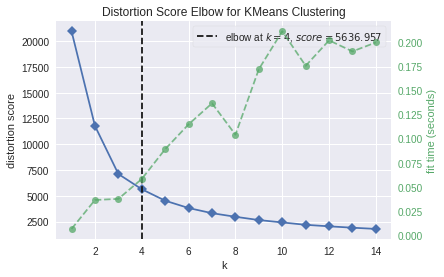


Clusters =  4




In [ ]:
#elbow method for K-means clustering algorithm for data 6

print("\n K-means clustering of Data6.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(data6dimensionkmeans)
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')


In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)

km = KMeans(n_clusters=4)
K_means_clusters = km.fit_predict(data6dimensionkmeans)
K_means_clusters

dataframe6['kcluster'] = K_means_clusters
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)

 Predicted labels according to number of optimum number of clusters 

 [3 3 1 ... 2 2 2]



K-Means Clustering for Data6.csv



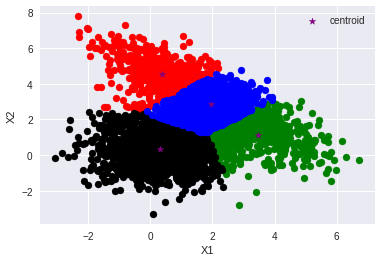

In [ ]:
import matplotlib.pyplot as plt
df1 = dataframe6[dataframe6.kcluster==0]
df2 = dataframe6[dataframe6.kcluster==1]
df3 = dataframe6[dataframe6.kcluster==2]
df4 = dataframe6[dataframe6.kcluster==3]

plt.scatter(df1.X1,df1.X2,color='green')
plt.scatter(df2.X1,df2.X2,color='red')
plt.scatter(df3.X1,df3.X2,color='black')
plt.scatter(df4.X1,df4.X2,color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
print('\nK-Means Clustering for Data6.csv\n')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

Task 1 (1) Heirarchical Clustering for Data6.csv

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



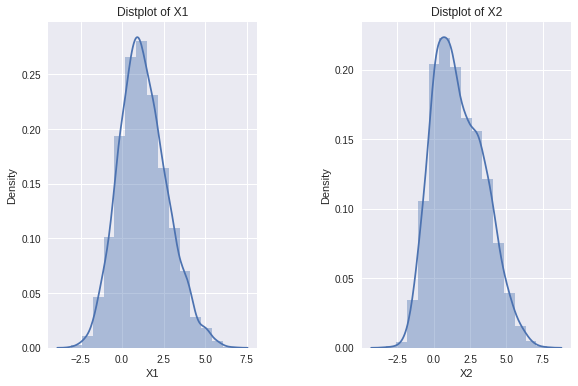

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import seaborn as sns

# graph size
plt.figure(1 , figsize = (15 , 6))
graph = 0

# for loop
for x in ['X1' , 'X2']:
    graph += 1

    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataframe6[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))

# showing the graph
plt.show()

In [ ]:
data6dimheirar = dataframe6.iloc[:,1:3].values
data6dimheirar

array([[ 1.388261,  2.076096],
       [ 2.177247,  3.102304],
       [ 0.378645,  5.30761 ],
       ...,
       [ 1.078797,  1.526153],
       [ 1.974889, -0.649343],
       [-0.127192, -0.763974]])

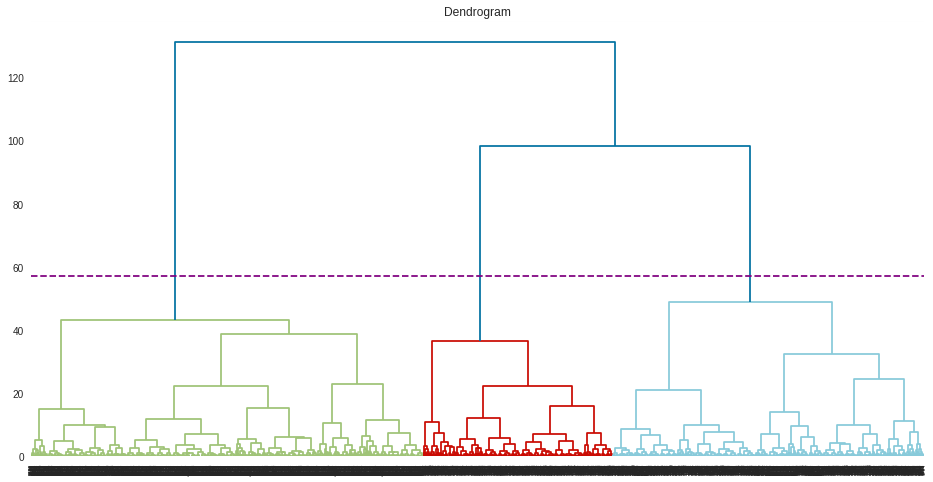

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data6dimheirar, method  = "ward"))


plt.title('Dendrogram')

#drawing threshold
plt.axhline(y=57, color='purple', linestyle='--')

plt.show()

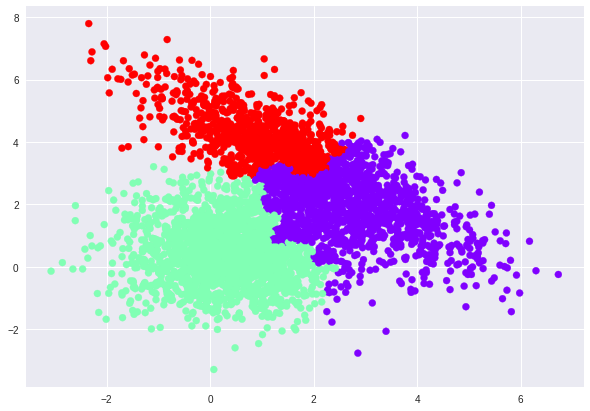

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
heirarclusters = cluster.fit_predict(data6dimheirar)
dataframe6['hcluster'] = pd.DataFrame(heirarclusters)

plt.figure(figsize=(10, 7))
plt.scatter(data6dimheirar[:,0], data6dimheirar[:,1], c=cluster.labels_, cmap='rainbow')

Task 2 (1) Evaluate the performance of the clustering algorithm using external validation metrics (K - Means Clustering) (Data6.csv)

In [ ]:
# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K-Means Clustering) (Data6.csv)

KMscore = K_means_clusters.tolist()

print('\nPerformance Evaluation of K-Means Clustering Algorithm for Data6.csv using external validation metrics \n')
print ('Rand Index Score = ', rand_score(KMscore, dataframe6['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(KMscore, dataframe6['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(KMscore, dataframe6['Class'], average='weighted'))

# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (Heirarchical Clustering) (Data6.csv)

Heirarscore = heirarclusters.tolist()

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for Data6.csv using external validation metrics \n')

print ('Rand Index Score = ', rand_score(Heirarscore, dataframe6['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(Heirarscore, dataframe6['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(Heirarscore, dataframe6['Class'], average='weighted'))



Performance Evaluation of K-Means Clustering Algorithm for Data6.csv using external validation metrics 

Rand Index Score =  0.749809337797619 		Rand Index Adjusted for Chance Score =  0.4995704496856328 		Jaccard Similarity Index Score =  0.11877866197266064

Performance Evaluation of Heirarchical Clustering Algorithm for Data6.csv using external validation metrics 

Rand Index Score =  0.7694196428571428 		Rand Index Adjusted for Chance Score =  0.5388076496282358 		Jaccard Similarity Index Score =  0.004194250717810296


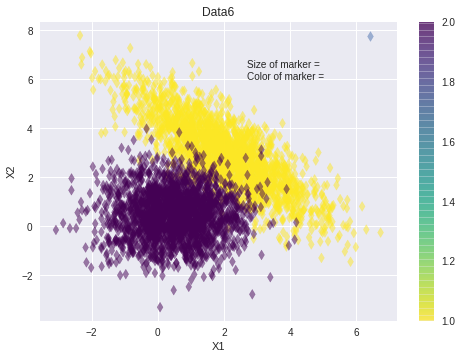

In [ ]:
# Task 1 (3) Plot (2D or 3D) the data points for each dataset and color them according to the original class (Data6.csv)


plt.style.use("seaborn")
plt.scatter(
    x=dataframe6.X1,
    y=dataframe6.X2,
    c=dataframe6.Class,
    cmap='viridis_r',
    marker="d",
    alpha=0.5,
)

plt.title("Data6")
plt.legend([""])
plt.xlabel("X1")
plt.ylabel("X2")
plt.text(2.7,6,"Size of marker = \n" "Color of marker = ",
)

plt.colorbar()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (K-Means Clustering (Data6.csv)) 



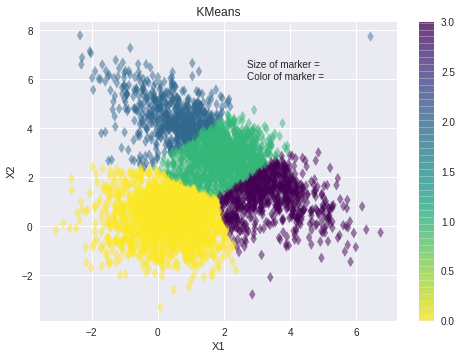

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (K-Means Clustering (Data6.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (K-Means Clustering (Data6.csv)) \n')

plt.style.use("seaborn")
plt.scatter(
    x=dataframe6.X1,
    y=dataframe6.X2,
    c=dataframe6.kcluster,
    cmap='viridis_r',
    marker="d",
    alpha=0.5,
)

plt.title(" KMeans ")
plt.legend([""])
plt.xlabel("X1")
plt.ylabel("X2")
plt.text(2.7,6,"Size of marker = \n" "Color of marker = ",
)

plt.colorbar()




 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (Heirarchical Clustering (Data6.csv)) 



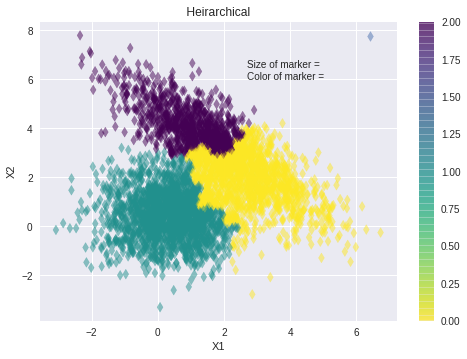

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (Heirarchical Clustering (Data6.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (Heirarchical Clustering (Data6.csv)) \n')

plt.style.use("seaborn")
plt.scatter(
    x=dataframe6.X1,
    y=dataframe6.X2,
    c=dataframe6.hcluster,
    cmap='viridis_r',
    marker="d",
    alpha=0.5,
)

plt.title(" Heirarchical ")
plt.legend([""])
plt.xlabel("X1")
plt.ylabel("X2")
plt.text(2.7,6,"Size of marker = \n" "Color of marker = ",
)

plt.colorbar()

Data 7.csv

In [ ]:
dataframe7.head()

Unnamed: 0        X1        X2  Class
0           1 -3.000000 -3.000000      5
1           2 -3.000000  3.000000      4
2           3  3.000000 -3.000000      6
3           4  3.000000  3.000000      3
4           5 -0.417091  0.114782      1

In [ ]:
#Checking for missing values in dataset 7
dataframe7.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
Class         0
dtype: int64

In [ ]:
#contents of dataset 7
dataframe7

Unnamed: 0        X1        X2  Class
0             1 -3.000000 -3.000000      5
1             2 -3.000000  3.000000      4
2             3  3.000000 -3.000000      6
3             4  3.000000  3.000000      3
4             5 -0.417091  0.114782      1
..          ...       ...       ...    ...
765         766 -1.604434 -1.118861      2
766         767 -3.050000 -3.050000      5
767         768 -3.050000  2.950000      4
768         769  2.950000 -3.050000      6
769         770  2.950000  2.950000      3

[770 rows x 4 columns]

Task 1 (1) K-means clustering for data7.csv

In [ ]:
#allocating all the features from data set in array
data7dimensionkmeans = dataframe7.iloc[:,1:3].values
data7dimensionkmeans

array([[-3.  , -3.  ],
       [-3.  ,  3.  ],
       [ 3.  , -3.  ],
       ...,
       [-3.05,  2.95],
       [ 2.95, -3.05],
       [ 2.95,  2.95]])


 K-means clustering of Data7.csv 



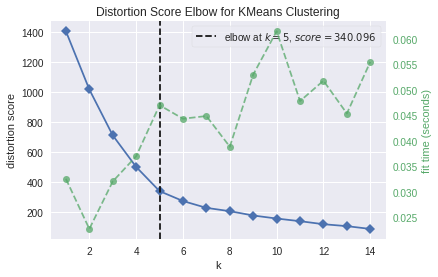


Clusters =  5




In [ ]:
#elbow method for K-means clustering algorithm for data 7

print("\n K-means clustering of Data7.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(data7dimensionkmeans)
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')


In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)

km = KMeans(n_clusters=5)
K_means_clusters = km.fit_predict(data7dimensionkmeans)
K_means_clusters

dataframe7['kcluster'] = K_means_clusters
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)

 Predicted labels according to number of optimum number of clusters 

 [0 4 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 4 2 3 0 4 0 2
 0 4 0 2 0 2 0 2 4 2 4 0 4 0 2 4 4 4 3 4 2 4 4 3 4 2 0 4 4 2 2 4 0 4 3 0 4
 2 0 3 0 2 2 4 3 2 3 2 3 2 4 


K-Means Clustering for Data7.csv



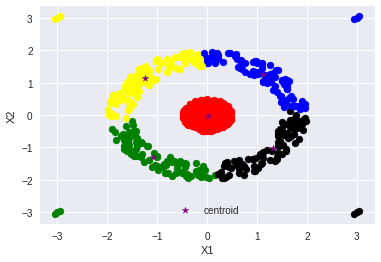

In [ ]:
df1 = dataframe7[dataframe7.kcluster==0]
df2 = dataframe7[dataframe7.kcluster==1]
df3 = dataframe7[dataframe7.kcluster==2]
df4 = dataframe7[dataframe7.kcluster==3]
df5 = dataframe7[dataframe7.kcluster==4]
plt.scatter(df1.X1,df1.X2,color='green')
plt.scatter(df2.X1,df2.X2,color='red')
plt.scatter(df3.X1,df3.X2,color='black')
plt.scatter(df4.X1,df4.X2,color='blue')
plt.scatter(df5.X1,df5.X2,color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
print('\nK-Means Clustering for Data7.csv\n')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

Task 1 (1) Heirarchical Clustering for Data7.csv

In [ ]:
data7dimheirar = dataframe7.iloc[:,1:4].values
data7dimheirar

array([[-3.  , -3.  ,  5.  ],
       [-3.  ,  3.  ,  4.  ],
       [ 3.  , -3.  ,  6.  ],
       ...,
       [-3.05,  2.95,  4.  ],
       [ 2.95, -3.05,  6.  ],
       [ 2.95,  2.95,  3.  ]])

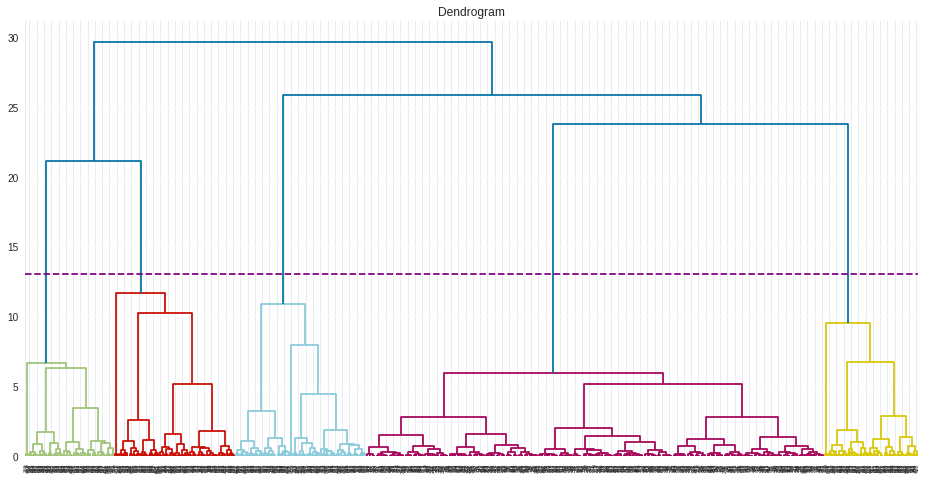

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data7dimheirar, method  = "ward"))


plt.title('Dendrogram')

#drawing threshold
plt.axhline(y=13, color='purple', linestyle='--')

plt.show()

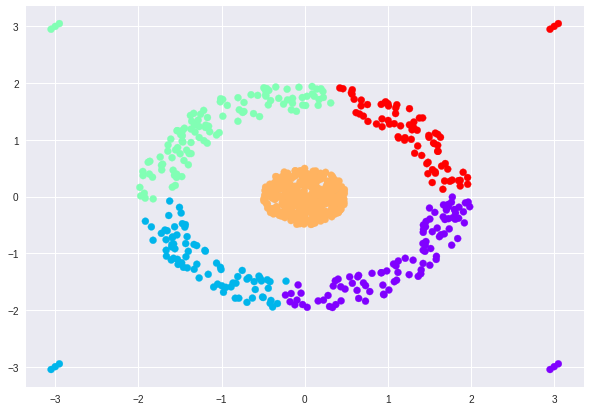

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
heirarclusters = cluster.fit_predict(data7dimheirar)
dataframe7['hcluster'] = pd.DataFrame(heirarclusters)

plt.figure(figsize=(10, 7))
plt.scatter(data7dimheirar[:,0], data7dimheirar[:,1], c=cluster.labels_, cmap='rainbow')

Task 2 (1) Evaluate the performance of the clustering algorithm using external validation metrics (K - Means Clustering) (Data7.csv)

In [ ]:
# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K-Means Clustering) (Data7.csv)

KMscore = K_means_clusters.tolist()

print('\nPerformance Evaluation of K-Means Clustering Algorithm for Data4.csv using external validation metrics \n')
print ('Rand Index Score = ', rand_score(KMscore, dataframe7['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(KMscore, dataframe7['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(KMscore, dataframe7['Class'], average='weighted'))


# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (Heirarchical Clustering) (Data7.csv)

Heirarscore = heirarclusters.tolist()

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for Data4.csv using external validation metrics \n')

print ('Rand Index Score = ', rand_score(Heirarscore, dataframe7['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(Heirarscore, dataframe7['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(Heirarscore, dataframe7['Class'], average='weighted'))



Performance Evaluation of K-Means Clustering Algorithm for Data4.csv using external validation metrics 

Rand Index Score =  0.8295070339283603 		Rand Index Adjusted for Chance Score =  0.6552741707017764 		Jaccard Similarity Index Score =  0.02841530054644809

Performance Evaluation of Heirarchical Clustering Algorithm for Data4.csv using external validation metrics 

Rand Index Score =  0.830972928242109 		Rand Index Adjusted for Chance Score =  0.658268921995756 		Jaccard Similarity Index Score =  0.04410616705698672


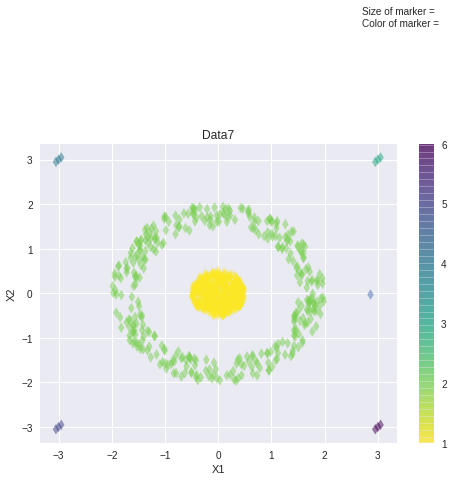

In [ ]:
# Task 1 (3) Plot (2D or 3D) the data points for each dataset and color them according to the original class (Data7.csv)

plt.style.use("seaborn")
plt.scatter(
    x=dataframe7.X1,
    y=dataframe7.X2,
    c=dataframe7.Class,
    cmap='viridis_r',
    marker="d",
    alpha=0.5,
)

plt.title("Data7")
plt.legend([""])
plt.xlabel("X1")
plt.ylabel("X2")
plt.text(2.7,6,"Size of marker = \n" "Color of marker = ",
)

plt.colorbar()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (K-Means Clustering (Data7.csv)) 



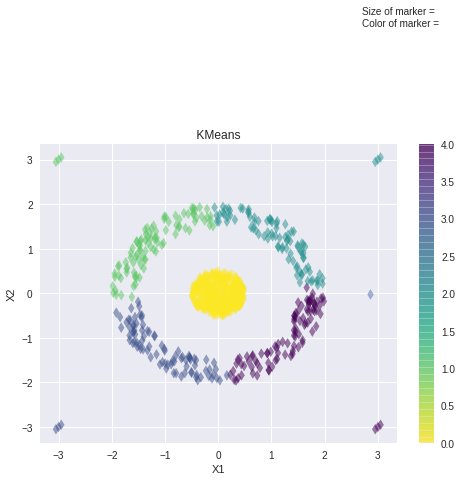

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (K-Means Clustering (Data7.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (K-Means Clustering (Data7.csv)) \n')

plt.style.use("seaborn")
plt.scatter(
    x=dataframe7.X1,
    y=dataframe7.X2,
    c=dataframe7.kcluster,
    cmap='viridis_r',
    marker="d",
    alpha=0.5,
)

plt.title(" KMeans ")
plt.legend([""])
plt.xlabel("X1")
plt.ylabel("X2")
plt.text(2.7,6,"Size of marker = \n" "Color of marker = ",
)

plt.colorbar()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (Heirarchical Clustering (Data7.csv)) 



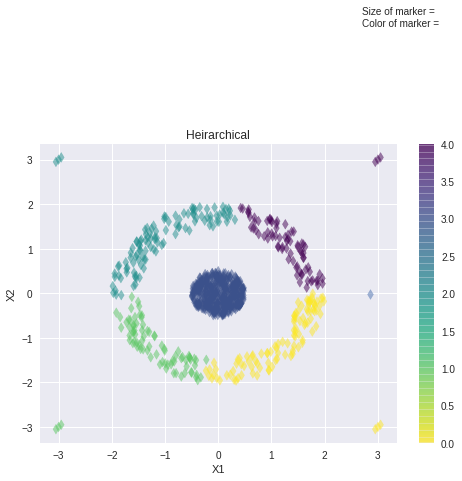

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (Heirarchical Clustering (Data7.csv))


print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (Heirarchical Clustering (Data7.csv)) \n')

plt.style.use("seaborn")
plt.scatter(
    x=dataframe7.X1,
    y=dataframe7.X2,
    c=dataframe7.hcluster,
    cmap='viridis_r',
    marker="d",
    alpha=0.5,
)

plt.title("Heirarchical")
plt.legend([""])
plt.xlabel("X1")
plt.ylabel("X2")
plt.text(2.7,6,"Size of marker = \n" "Color of marker = ",
)

plt.colorbar()

Data8.csv

In [ ]:
dataframe8.head()

Unnamed: 0        X1        X2       X3  Class
0           1  0.000000  0.000000  1.00000      1
1           2  0.000000  0.052336  0.99863      1
2           3  0.049774  0.016173  0.99863      1
3           4  0.030762 -0.042341  0.99863      1
4           5 -0.030762 -0.042341  0.99863      1

In [ ]:
#Checking for missing values in dataset 8
dataframe8.isnull().sum()

In [ ]:
#Contents of dataframe8
dataframe8

Unnamed: 0        X1        X2       X3  Class
0              1  0.000000  0.000000  1.00000      1
1              2  0.000000  0.052336  0.99863      1
2              3  0.049774  0.016173  0.99863      1
3              4  0.030762 -0.042341  0.99863      1
4              5 -0.030762 -0.042341  0.99863      1
...          ...       ...       ...      ...    ...
3997        3998  0.049774 -0.016173 -0.99863      1
3998        3999  0.000000 -0.052336 -0.99863      1
3999        4000 -0.049774 -0.016173 -0.99863      1
4000        4001 -0.030762  0.042341 -0.99863      1
4001        4002  0.000000  0.000000 -1.00000      1

[4002 rows x 5 columns]

Task 1 (1) K-means clustering for data8.csv

In [ ]:
#allocating all the features from data set in array
data8dimensionkmeans = dataframe8.iloc[:,1:4].values
data8dimensionkmeans

array([[ 0.      ,  0.      ,  1.      ],
       [ 0.      ,  0.052336,  0.99863 ],
       [ 0.049774,  0.016173,  0.99863 ],
       ...,
       [-0.049774, -0.016173, -0.99863 ],
       [-0.030762,  0.042341, -0.99863 ],
       [ 0.      ,  0.      , -1.      ]])


 K-means clustering of Data8.csv 



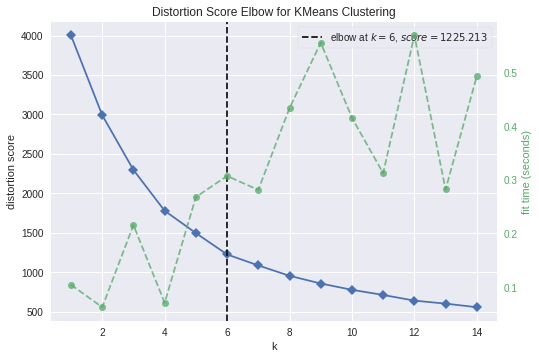


Clusters =  6




In [ ]:
#elbow method for K-means clustering algorithm for data 8

print("\n K-means clustering of Data8.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(data8dimensionkmeans)
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')


In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)

optimum_k = KMeans(n_clusters = 6, init = 'k-means++',  random_state=42)
K_means_clusters = optimum_k.fit_predict(data8dimensionkmeans)
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)
dataframe8['cluster'] = K_means_clusters

 Predicted labels according to number of optimum number of clusters 

 [2 2 2 ... 4 4 4]


In [ ]:
data1 = dataframe8[dataframe8.cluster==0]
data2 = dataframe8[dataframe8.cluster==1]
data3 = dataframe8[dataframe8.cluster==2]
data4 = dataframe8[dataframe8.cluster==3]
data5 = dataframe8[dataframe8.cluster==4]
data6 = dataframe8[dataframe8.cluster==5]


K-Means Clustering for Data8.csv



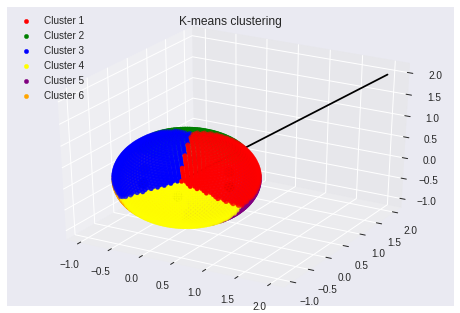

In [ ]:
#Plotting K-means clusters


kplot = plt.axes(projection='3d')
xline = np.linspace(0, 2, 100)
yline = np.linspace(0, 2, 100)
zline = np.linspace(0, 2, 100)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red',     label = 'Cluster 1')
kplot.scatter3D(data2.X1, data2.X2, data2.X3, c ='green',  label = 'Cluster 2')
kplot.scatter3D(data3.X1, data3.X2, data3.X3, c ='blue',   label = 'Cluster 3')
kplot.scatter3D(data4.X1, data4.X2, data4.X3, c ='yellow', label = 'Cluster 4')
kplot.scatter3D(data5.X1, data5.X2, data5.X3, c ='purple', label = 'Cluster 5')
kplot.scatter3D(data6.X1, data6.X2, data6.X3, c ='orange', label = 'Cluster 6')

plt.scatter(optimum_k.cluster_centers_[:,0], optimum_k.cluster_centers_[:,1], color = 'black', s = 100)
print('\nK-Means Clustering for Data8.csv\n')
plt.legend()
plt.title("K-means clustering")
plt.show()

Task 1 (1) Heirarchical Clustering for Data8.csv

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



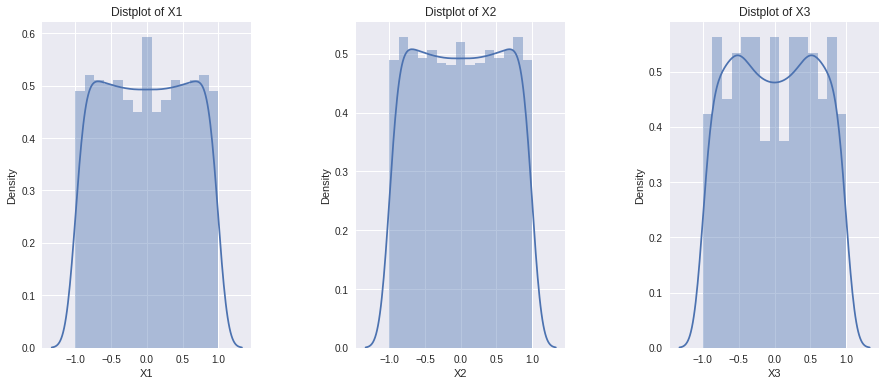

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import seaborn as sns

# graph size
plt.figure(1 , figsize = (15 , 6))
graph = 0

# for loop
for x in ['X1' , 'X2' , 'X3']:
    graph += 1

    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataframe8[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))

# showing the graph
plt.show()

In [ ]:
data8dimheirar = dataframe8.iloc[:,1:4].values
data8dimheirar

array([[ 0.      ,  0.      ,  1.      ],
       [ 0.      ,  0.052336,  0.99863 ],
       [ 0.049774,  0.016173,  0.99863 ],
       ...,
       [-0.049774, -0.016173, -0.99863 ],
       [-0.030762,  0.042341, -0.99863 ],
       [ 0.      ,  0.      , -1.      ]])

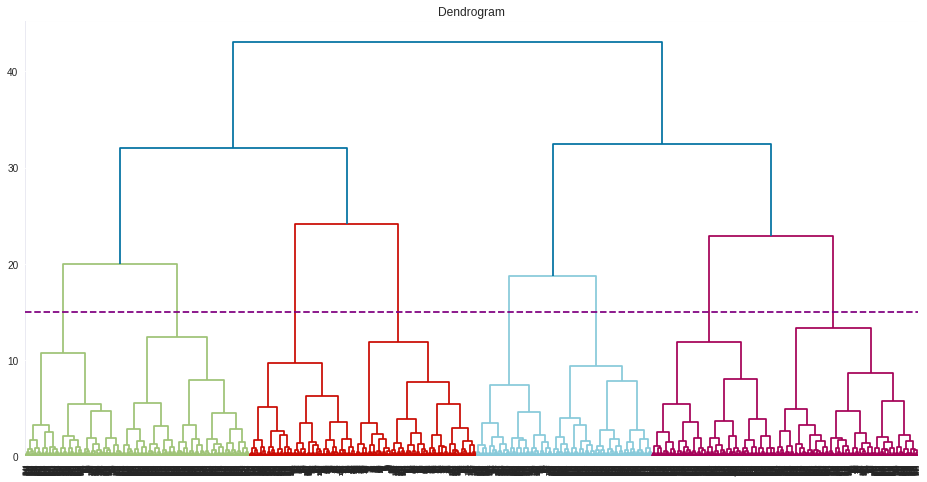

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data8dimheirar, method  = "ward"))


plt.title('Dendrogram')

#drawing threshold
plt.axhline(y=15, color='purple', linestyle='--')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterheiroptimum = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
heirarclusters = clusterheiroptimum.fit_predict(data8dimheirar)
print(heirarclusters)

[1 1 1 ... 3 5 3]


In [ ]:
#Plotting Heirarchical Clusters

import plotly as plt
import plotly.graph_objects as go

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='average')

# training the model on dataset
y_model = model.fit_predict(data8dimheirar)

# creating pandas dataframe
dataframe8['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(

    # storing the variables in x, y, and z axis
    x= dataframe8['X1'],
    y= dataframe8['X2'],
    z= dataframe8['X3'],
    mode='markers',
     marker=dict(
        color = dataframe8['cluster'],
        size= 3,
        line=dict(
            color= dataframe8['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'X1'),
            yaxis = dict(title  = 'X2'),
            zaxis = dict(title  = 'X3')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K - Means Clustering) (Data8.csv)

In [ ]:
# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (K-Means Clustering) (Data8.csv)

KMscore = K_means_clusters.tolist()

print('\nPerformance Evaluation of K-Means Clustering Algorithm for Data4.csv using external validation metrics \n')
print ('Rand Index Score = ', rand_score(KMscore, dataframe8['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(KMscore, dataframe8['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(KMscore, dataframe8['Class'], average='weighted'))


# Task 1 (2) Evaluate the performance of the clustering algorithm using external validation metrics (Heirarchical Clustering) (Data8.csv)

Heirarscore = y_model.tolist()

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for Data4.csv using external validation metrics \n')

print ('Rand Index Score = ', rand_score(Heirarscore, dataframe8['Class']), '\t\tRand Index Adjusted for Chance Score = ', adjusted_rand_score(Heirarscore, dataframe8['Class']), '\t\tJaccard Similarity Index Score = ', jaccard_score(Heirarscore, dataframe8['Class'], average='weighted'))



Performance Evaluation of K-Means Clustering Algorithm for Data4.csv using external validation metrics 

Rand Index Score =  0.1664592597477817 		Rand Index Adjusted for Chance Score =  0.0 		Jaccard Similarity Index Score =  0.027944610902944332

Performance Evaluation of Heirarchical Clustering Algorithm for Data4.csv using external validation metrics 

Rand Index Score =  0.14773780318038932 		Rand Index Adjusted for Chance Score =  0.0 		Jaccard Similarity Index Score =  0.03373032374367539


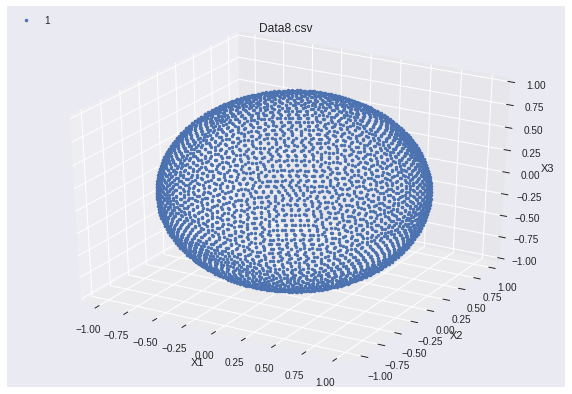

In [ ]:
# Task 1 (3) Plot (2D or 3D) the data points for each dataset and color them according to the original class (Data8.csv)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
groups = dataframe8.groupby("Class")
ax = plt.axes(projection="3d")


for Class, group in groups:
  ax.plot(group["X1"], group["X2"], group["X3"], marker=".", linestyle="", label= Class)

ax.legend(loc = 'upper left')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Data8.csv')
plt.show()


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (K-Means Clustering (Data8.csv)) 



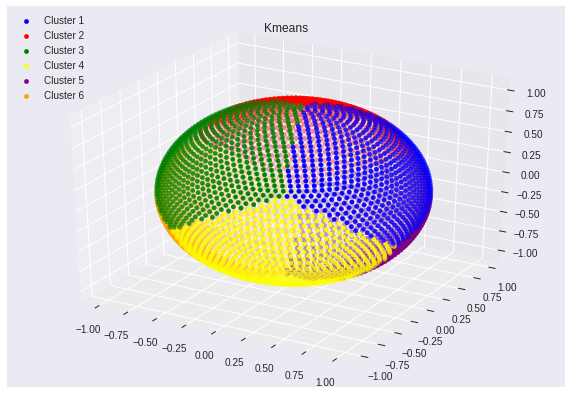


 Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class 
 allocated by the clustering algorithm (Heirarchical Clustering (Data8.csv)) 



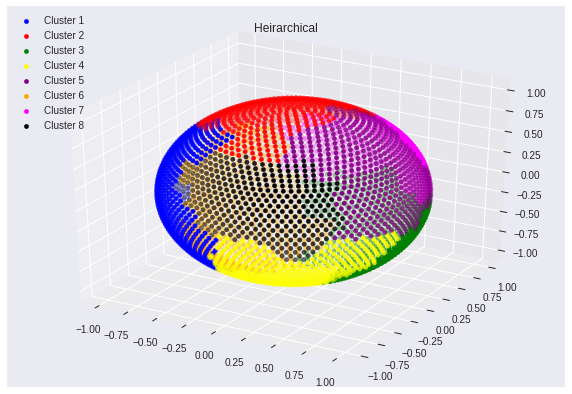

In [ ]:
# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (K-Means Clustering (Data8.csv))

print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (K-Means Clustering (Data8.csv)) \n')
plt.figure(figsize=(10,7))
dataframe8['kcluster'] = K_means_clusters
kdata1 = dataframe8[dataframe8.kcluster==0]
kdata2 = dataframe8[dataframe8.kcluster==1]
kdata3 = dataframe8[dataframe8.kcluster==2]
kdata4 = dataframe8[dataframe8.kcluster==3]
kdata5 = dataframe8[dataframe8.kcluster==4]
kdata6 = dataframe8[dataframe8.kcluster==5]


kplot = plt.axes(projection='3d')
kplot.scatter3D(kdata1.X1, kdata1.X2, kdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(kdata2.X1, kdata2.X2, kdata2.X3, c ='red',      label = 'Cluster 2')
kplot.scatter3D(kdata3.X1, kdata3.X2, kdata3.X3, c ='green',    label = 'Cluster 3')
kplot.scatter3D(kdata4.X1, kdata4.X2, kdata4.X3, c ='yellow',   label = 'Cluster 4')
kplot.scatter3D(kdata5.X1, kdata5.X2, kdata5.X3, c ='purple',   label = 'Cluster 5')
kplot.scatter3D(kdata6.X1, kdata6.X2, kdata6.X3, c ='orange',   label = 'Cluster 6')
plt.legend(loc = 'upper left')
plt.title("Kmeans")
plt.show()


# Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm (Heirarchical Clustering (Data8.csv))


print('\n Task 1 (4) Plot (2D or 3D) the data points for each dataset and color them according to the class \n allocated by the clustering algorithm (Heirarchical Clustering (Data8.csv)) \n')
plt.figure(figsize=(10,7))
dataframe8['hcluster'] = heirarclusters
hdata1 = dataframe8[dataframe8.hcluster==0]
hdata2 = dataframe8[dataframe8.hcluster==1]
hdata3 = dataframe8[dataframe8.hcluster==2]
hdata4 = dataframe8[dataframe8.hcluster==3]
hdata5 = dataframe8[dataframe8.hcluster==4]
hdata6 = dataframe8[dataframe8.hcluster==5]
hdata7 = dataframe8[dataframe8.hcluster==6]
hdata8 = dataframe8[dataframe8.hcluster==7]

kplot = plt.axes(projection='3d')
kplot.scatter3D(hdata1.X1, hdata1.X2, hdata1.X3, c ='blue',     label = 'Cluster 1')
kplot.scatter3D(hdata2.X1, hdata2.X2, hdata2.X3, c ='red',      label = 'Cluster 2')
kplot.scatter3D(hdata3.X1, hdata3.X2, hdata3.X3, c ='green',    label = 'Cluster 3')
kplot.scatter3D(hdata4.X1, hdata4.X2, hdata4.X3, c ='yellow',   label = 'Cluster 4')
kplot.scatter3D(hdata5.X1, hdata5.X2, hdata5.X3, c ='purple',   label = 'Cluster 5')
kplot.scatter3D(hdata6.X1, hdata6.X2, hdata6.X3, c ='orange',   label = 'Cluster 6')
kplot.scatter3D(hdata7.X1, hdata7.X2, hdata7.X3, c ='magenta',   label = 'Cluster 7')
kplot.scatter3D(hdata8.X1, hdata8.X2, hdata8.X3, c ='black',   label = 'Cluster 8')

plt.legend(loc = 'upper left')
plt.title("Heirarchical")
plt.show()

Task 2)

The world indicators dataset compares different countries based on selected attributes.

In [ ]:
#reading the data set

wi = pd.read_csv('World Indicators.csv')
wi

Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0         0.025             72.0%                    25.0       41852.0   
1         0.046             52.1%                    66.0       13576.0   
2         0.037             65.9%                    29.0        3761.0   
3         0.024             19.5%                    60.0        2215.0   
4         0.042             43.5%                    13.0           NaN   
..          ...               ...                     ...           ...   
203         NaN               NaN                     NaN           NaN   
204       0.013             46.5%                     5.0     2191193.0   
205       0.015             41.9%                     7.0        4430.0   
206       0.020             62.8%                   141.0       70198.0   
207       0.011               NaN                     NaN           NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,864,638             0.044              $233            451.0   
1       $104,115,863,405             0.034              $178            282.0   
2         $7,294,900,431             0.045               $34            270.0   
3        $15,292,424,757             0.052              $404            152.0   
4        $10,395,757,480             0.064               $39            270.0   
..                   ...               ...               ...              ...   
203                  NaN               NaN               NaN              NaN   
204  $15,533,800,000,000             0.177            $8,467            187.0   
205      $47,236,710,623             0.088            $1,213            336.0   
206     $316,482,176,579             0.045              $487            864.0   
207                  NaN               NaN               NaN              NaN   

     Infant Mortality Rate  Internet Usage  Lending Interest  \
0                    0.023             0.1             0.080   
1                    0.107             0.1             0.188   
2                    0.060             0.0               NaN   
3                    0.039             0.1             0.110   
4                    0.068             0.0               NaN   
..                     ...             ...               ...   
203                    NaN             NaN               NaN   
204                  0.006             0.7             0.033   
205                  0.010             0.5             0.098   
206                  0.014             0.4             0.172   
207                    NaN             0.4               NaN   

     Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                      72.0                  69.0                 0.9   
1                      53.0                  50.0                 0.5   
2                      60.0                  58.0                 0.8   
3                      46.0                  47.0                 1.5   
4                      56.0                  55.0                 0.5   
..                      ...                   ...                 ...   
203                     NaN                   NaN                 NaN   
204                    81.0                  76.0                 0.9   
205                    80.0                  73.0                 1.4   
206                    77.0                  71.0                 1.0   
207                    83.0                  76.0                 NaN   

     Population 0-14  Population 15-64  Population 65+  Population Urban  \
0              0.272             0.681           0.047             0.682   
1              0.477             0.499           0.024             0.409   
2              0.432             0.539           0.029             0.423   
3              0.340             0.625           0.035             0.565   
4              0.458             0.517           0.025             0.265   
..               ...         

In [ ]:
#getting the following information about the data frame (World Indicators.csv) number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)
wi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [ ]:
#viewing statistical parameters
wi.describe()

Birth Rate  Days to Start Business  Energy Usage  Health Exp % GDP  \
count  199.000000              181.000000  1.360000e+02        185.000000   
mean     0.021759               30.331492  9.223794e+04          0.067362   
std      0.010721               56.584357  3.125758e+05          0.028462   
min      0.008000                1.000000  7.650000e+02          0.017000   
25%      0.012000                9.000000  5.699000e+03          0.047000   
50%      0.019000               18.000000  1.808200e+04          0.065000   
75%      0.028000               35.000000  5.155725e+04          0.085000   
max      0.050000              694.000000  2.727728e+06          0.177000   

       Hours to do Tax  Infant Mortality Rate  Internet Usage  \
count       180.000000             188.000000      199.000000   
mean        279.283333               0.027340        0.376884   
std         247.783296               0.025358        0.284034   
min          12.000000               0.002000        0.000000   
25%         151.750000               0.007000        0.100000   
50%         224.000000               0.016000        0.400000   
75%         327.000000               0.042250        0.600000   
max        2600.000000               0.112000        0.900000   

       Lending Interest  Life Expectancy Female  Life Expectancy Male  \
count        131.000000              197.000000            197.000000   
mean           0.122588               72.746193             68.035533   
std            0.079495               10.091750              8.868297   
min            0.005000               45.000000             45.000000   
25%            0.074500               67.000000             62.000000   
50%            0.106000               76.000000             70.000000   
75%            0.150000               80.000000             75.000000   
max            0.525000               87.000000             81.000000   

       Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
count          196.000000       191.000000        191.000000      191.000000   
mean             0.958673         0.286963          0.635550        0.077424   
std              0.431784         0.107775          0.071489        0.052995   
min              0.000000         0.119000          0.475000        0.003000   
25%              0.700000         0.189000          0.581000        0.034000   
50%              1.000000         0.279000          0.654000        0.056000   
75%              1.200000         0.382500          0.684500        0.118000   
max              2.500000         0.499000          0.857000        0.237000   

       Population Urban  
count        206.000000  
mean           0.576728  
std            0.244372  
min            0.089000  
25%            0.377750  
50%            0.571500  
75%            0.772500  
max            1.000000

In [ ]:
#wrangling of data before cluster analysis

wi[['1', 'GDP']] = wi['GDP'].str.split('$', expand=True)
wi[['3', 'Health Exp/Capita']] = wi['Health Exp/Capita'].str.split('$', expand=True)
wi[['Business Tax Rate', '5']] = wi['Business Tax Rate'].str.split('%', expand=True)
wi = wi.drop(columns=['1','3','5'])
wi['GDP'] = wi['GDP'].str.replace(",", "")
wi['Health Exp/Capita'] = wi['Health Exp/Capita'].str.replace(",", "")
wi["Business Tax Rate"] = wi["Business Tax Rate"].astype(str).astype(float)
wi["GDP"] = wi["GDP"].astype(str).astype(float)
wi["Health Exp/Capita"] = wi["Health Exp/Capita"].astype(str).astype(float)

In [ ]:
worldata=wi.iloc[:,[0,8,9,19]]
worldata.dropna(inplace=True)
worldata

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Birth Rate  Infant Mortality Rate  Internet Usage              Country
0         0.025                  0.023             0.1              Algeria
1         0.046                  0.107             0.1               Angola
2         0.037                  0.060             0.0                Benin
3         0.024                  0.039             0.1             Botswana
4         0.042                  0.068             0.0         Burkina Faso
..          ...                    ...             ...                  ...
201       0.018                  0.022             0.3             Suriname
202       0.015                  0.020             0.6  Trinidad and Tobago
204       0.013                  0.006             0.7        United States
205       0.015                  0.010             0.5              Uruguay
206       0.020                  0.014             0.4        Venezuela, RB

[181 rows x 4 columns]

In [ ]:
#scaling the data or standardization

from sklearn.preprocessing import StandardScaler
object = StandardScaler()
object.fit_transform(worldata.iloc[:,0:3])
df1

Birth Rate  Infant Mortality Rate  Internet Usage              Country  \
0         0.025                  0.023             0.1              Algeria   
1         0.046                  0.107             0.1               Angola   
2         0.037                  0.060             0.0                Benin   
3         0.024                  0.039             0.1             Botswana   
4         0.042                  0.068             0.0         Burkina Faso   
..          ...                    ...             ...                  ...   
201       0.018                  0.022             0.3             Suriname   
202       0.015                  0.020             0.6  Trinidad and Tobago   
204       0.013                  0.006             0.7        United States   
205       0.015                  0.010             0.5              Uruguay   
206       0.020                  0.014             0.4        Venezuela, RB   

     kcluster  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
201         2  
202         0  
204         0  
205         2  
206         2  

[181 rows x 5 columns]

1. Use K-means and hierarchical clustering methods to group similar countries
together


Task 2) 1) (a) K- means clustering method to group similar countries together


 K-means clustering of World Indicators.csv 



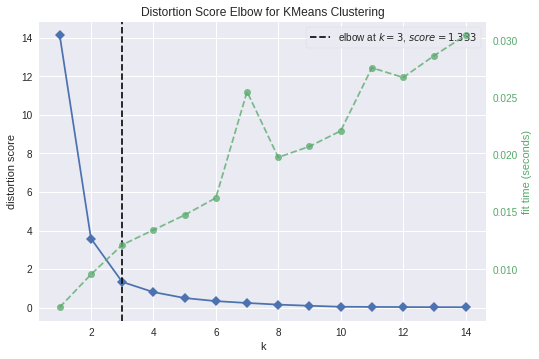


Clusters =  3




In [ ]:
#Task 2 1 (a) K- means clustering method to group similar countries together

#elbow method for K-means clustering algorithm for World Indicator.csv
print("\n K-means clustering of World Indicators.csv \n")
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,15)).fit(worldata.iloc[:,0:3])
visualizer.show()


print('\nClusters = ', visualizer.elbow_value_)
print('\n')

In [ ]:
#predicting labels of the data features with respect to number of clusters (elbow value)

optimum_k = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
K_means_clusters = optimum_k.fit_predict(worldata.iloc[:,0:3])
print(' Predicted labels according to number of optimum number of clusters \n\n', K_means_clusters)
worldata['kcluster'] = K_means_clusters

 Predicted labels according to number of optimum number of clusters 

 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 2
 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 2 1 1 0 1 2 2 1 1 0 2 0 1 1 0 2 1 1 1 1
 2 0 1 1 1 1 1 2 2 2 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 2 0 0
 0 0 2 2 2 2 0 0 0 0 0 2 2 0 0 1 1 0 2 0 2 2 0 2 1 0 1 0 2 1 1 0 1 1 1 2 1
 2 2 0 0 1 2 2 0 2 2 2 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 0 0 2 2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Task 2) 1) (a) Heirarchical clustering method to group similar countries together

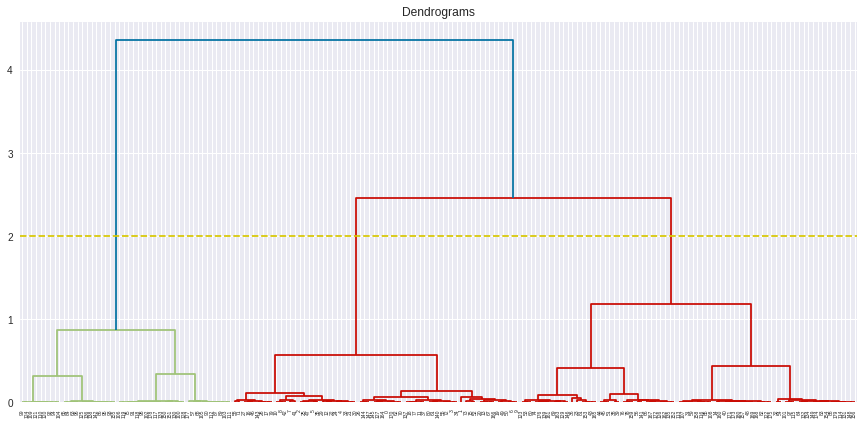

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(worldata.iloc[:,0:3], method='ward'))
plt.axhline(y=2, color='y', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
h_predicted=cluster.fit_predict(worldata.iloc[:,0:3])
h_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0])

In [ ]:
worldata['hcluster']=h_predicted
worldata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Birth Rate  Infant Mortality Rate  Internet Usage              Country  \
0         0.025                  0.023             0.1              Algeria   
1         0.046                  0.107             0.1               Angola   
2         0.037                  0.060             0.0                Benin   
3         0.024                  0.039             0.1             Botswana   
4         0.042                  0.068             0.0         Burkina Faso   
..          ...                    ...             ...                  ...   
201       0.018                  0.022             0.3             Suriname   
202       0.015                  0.020             0.6  Trinidad and Tobago   
204       0.013                  0.006             0.7        United States   
205       0.015                  0.010             0.5              Uruguay   
206       0.020                  0.014             0.4        Venezuela, RB   

     kcluster  hcluster  
0           1         2  
1           1         2  
2           1         2  
3           1         2  
4           1         2  
..        ...       ...  
201         2         0  
202         0         1  
204         0         1  
205         2         0  
206         2         0  

[181 rows x 6 columns]

Task 2) 2. Use Internal validation metrics to report the cluster quality

In [ ]:
# Task 2 (2) Evaluate the performance of the K-Means Clustering algorithm using internal validation metrics (K-Means Clustering) (World Indicators.csv)

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.metrics import silhouette_score

print('\nPerformance Evaluation of K-Means Clustering Algorithm for World Indicators.csv using internal validation metrics \n')
print('Calinski Harabasz coefficient  = ',metrics.calinski_harabasz_score(worldata.iloc[:,0:3], K_means_clusters),'\t\tSilhouette Coefficient = ', {silhouette_score(worldata.iloc[:,0:3], K_means_clusters)})

# Task 2 (2) Evaluate the performance of the Heirarchical clustering algorithm using internal validation metrics (Heirarchical Clustering) (World Indicators.csv)

print('\nPerformance Evaluation of Heirarchical Clustering Algorithm for World Indicators.csv using internal validation metrics \n')
print('Calinski Harabasz coefficient  = ',metrics.calinski_harabasz_score(worldata.iloc[:,0:3], h_predicted),'\t\tSilhouette Coefficient = ', {silhouette_score(worldata.iloc[:,0:3], h_predicted)})


Performance Evaluation of K-Means Clustering Algorithm for World Indicators.csv using internal validation metrics 

Calinski Harabasz coefficient  =  854.6197214643106 		Silhouette Coefficient =  {0.6467422623368279}

Performance Evaluation of Heirarchical Clustering Algorithm for World Indicators.csv using internal validation metrics 

Calinski Harabasz coefficient  =  706.5428569957885 		Silhouette Coefficient =  {0.6011746907968264}


Task 2) 3)

 Report the best clustering solution. Give a detailed list of all the groups and the
countries included within the groups

Solution) As we can see from Task 2) Internal Validation Metrics for both K-Means and Heirarchical Clustering Methods, by observing the Calinski Harabasz Coefficient and Silhouette Coefficient, it known that the clustering method with higher value in terms of Calinski Harabasz coefficient is most optimal and in terms of Silhouette Coefficient, value closer to 1 is most optimal.

Hence, we can conclude, for the data set World Indicator.csv, K means Clustering Algorithm is the best solution.

Please find detailed list of all groups and the countries included withing Clustering methods below ---

In [ ]:
# List of all groups and countries under K-Means Clustering Group
worldata[['Country','kcluster']].sort_values(by='kcluster')

Country  kcluster
95             Cyprus         0
129             Spain         0
127   Slovak Republic         0
122          Portugal         0
121            Poland         0
..                ...       ...
116           Moldova         2
161             Tonga         2
14   Egypt, Arab Rep.         2
164         Argentina         2
206     Venezuela, RB         2

[181 rows x 2 columns]

In [ ]:
# List of all groups and countries under Heirarchical Clustering Group
worldata[['Country','hcluster']].sort_values(by='hcluster')

Country  hcluster
206       Venezuela, RB         0
66           Kazakhstan         0
136  Iran, Islamic Rep.         0
61              Georgia         0
60                China         0
..                  ...       ...
159               Samoa         2
160     Solomon Islands         2
33           Mozambique         2
51               Zambia         2
0               Algeria         2

[181 rows x 2 columns]

Task 2) 4)

 Generate three different scatter plots of your choice and color the data points
according to the group. Example: “Life expectancy vs GDP”, “Infant Mortality vs
GDP”, etc.


Text(0.5, 1.0, 'Birth Rate vs Infant Mortality Rate')

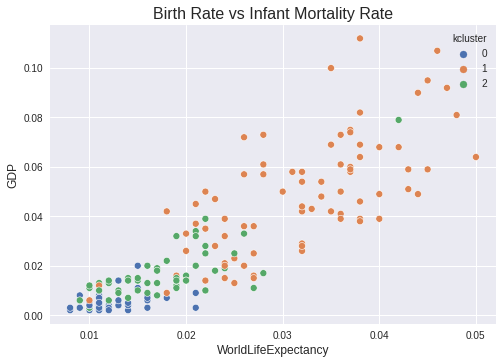

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Birth Rate', y='Infant Mortality Rate', data=worldata, hue='kcluster',palette="deep")
plt.xlabel("WorldLifeExpectancy", fontsize= 12)
plt.ylabel("GDP", fontsize= 12)
plt.title("Birth Rate vs Infant Mortality Rate", fontsize= 16)

Text(0.5, 1.0, 'Infant Mortality Rate vs Internet Usage')

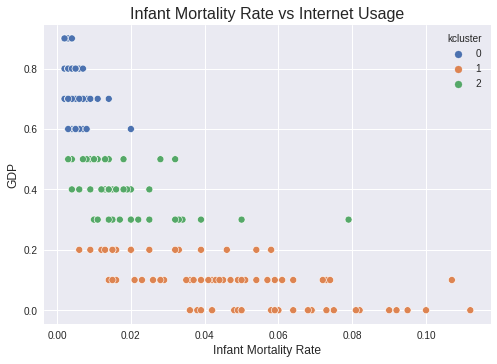

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Infant Mortality Rate', y='Internet Usage', data=worldata, hue='kcluster',palette="deep")
plt.xlabel("Infant Mortality Rate", fontsize= 12)
plt.ylabel("GDP", fontsize= 12)
plt.title("Infant Mortality Rate vs Internet Usage", fontsize= 16)

Text(0.5, 1.0, 'Internet Usage vs Birth Rate')

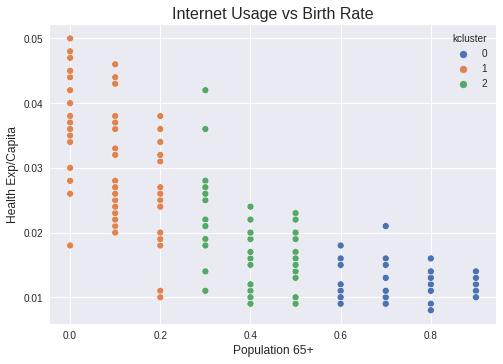

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Internet Usage', y='Birth Rate', data=worldata, hue='kcluster',palette="deep")
plt.xlabel("Population 65+", fontsize= 12)
plt.ylabel("Health Exp/Capita", fontsize= 12)
plt.title("Internet Usage vs Birth Rate", fontsize= 16)

Text(0.5, 1.0, 'Birth Rate vs Infant Mortality Rate')

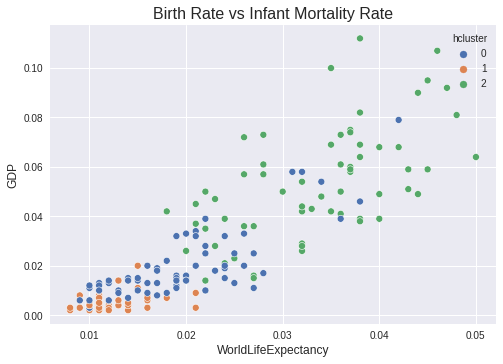

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Birth Rate', y='Infant Mortality Rate', data=worldata, hue='hcluster',palette="deep")
plt.xlabel("WorldLifeExpectancy", fontsize= 12)
plt.ylabel("GDP", fontsize= 12)
plt.title("Birth Rate vs Infant Mortality Rate", fontsize= 16)

Text(0.5, 1.0, 'Infant Mortality Rate vs Internet Usage')

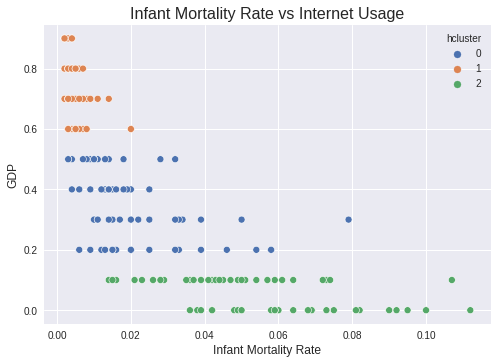

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Infant Mortality Rate', y='Internet Usage', data=worldata, hue='hcluster',palette="deep")
plt.xlabel("Infant Mortality Rate", fontsize= 12)
plt.ylabel("GDP", fontsize= 12)
plt.title("Infant Mortality Rate vs Internet Usage", fontsize= 16)

Text(0.5, 1.0, 'Internet Usage vs Birth Rate')

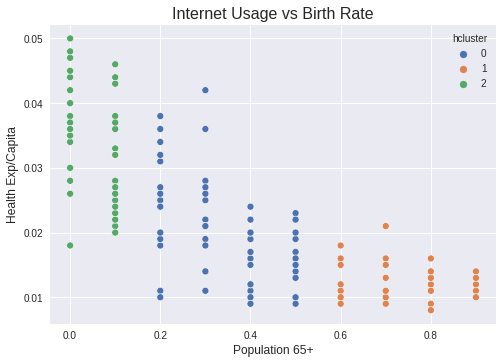

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Internet Usage', y='Birth Rate', data=worldata, hue='hcluster',palette="deep")
plt.xlabel("Population 65+", fontsize= 12)
plt.ylabel("Health Exp/Capita", fontsize= 12)
plt.title("Internet Usage vs Birth Rate", fontsize= 16)